Problem Statement:

* Electricity consumption prediction is crucial for both energy providers and consumers.
* Power companies need to balance energy supply and demand to prevent wastage and shortages.
* Consumers want to reduce their electricity bills by optimizing usage patterns.
* Governments and sustainability initiatives focus on reducing carbon footprints by promoting efficient energy use.

Objective

The objective of this project is to build machine learning models that can accurately predict electricity consumption based on historical data.

GOAL

The goal is to analyze electricity usage patterns and develop a machine learning model to predict consumption based on different household and environmental factors.

In [1]:
# for data ectraction and manipulation and analysis
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# stats
import scipy as sc
from sklearn.model_selection import train_test_split
#encoder
from sklearn.preprocessing import LabelEncoder

#Logistic
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix
#outliers
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Decision 
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#random
from sklearn.ensemble import RandomForestClassifier
# for AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
# Suppress only FutureWarnings
import warnings
warnings.filterwarnings("ignore")
#XG Boost
from xgboost import XGBClassifier
#SVM
from sklearn.svm import SVC
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
#Naive 
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [7]:
df=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\EDA\household_energy_dataset.csv")
df

,Household ID,Monthly Consumption (kWh),Household Size,House Type,Heating Type,Appliances Count,Avg Daily Usage (kWh),Month,Region,Efficiency,Solar Panels
0,1,206.52,2,Apartment,Electric,11,6.88,May,Midwest,A,Yes
1,2,383.01,4,Apartment,Gas,3,12.77,September,Southwest,D,No
2,3,287.67,5,Semi-Detached House,Gas,8,9.59,December,Southwest,D,Yes
3,4,191.48,4,Detached House,Electric,3,6.38,February,Southeast,B,Yes
4,5,432.68,6,Apartment,Electric,12,14.42,April,Midwest,A,No
...,...,...,...,...,...,...,...,...,...,...,...
995,996,111.70,1,Detached House,Solar,11,3.72,July,Southwest,D,Yes
996,997,291.63,3,Semi-Detached House,Electric,5,9.72,September,Southwest,D,Yes
997,998,231.68,3,Apartment,Electric,11,7.72,February,Northeast,C,No
998,999,335.73,5,Apartment,Gas,7,11.19,March,Southwest,C,Yes


In [8]:
df=df.drop(columns = ['Household ID'])

In [9]:
df

,Monthly Consumption (kWh),Household Size,House Type,Heating Type,Appliances Count,Avg Daily Usage (kWh),Month,Region,Efficiency,Solar Panels
0,206.52,2,Apartment,Electric,11,6.88,May,Midwest,A,Yes
1,383.01,4,Apartment,Gas,3,12.77,September,Southwest,D,No
2,287.67,5,Semi-Detached House,Gas,8,9.59,December,Southwest,D,Yes
3,191.48,4,Detached House,Electric,3,6.38,February,Southeast,B,Yes
4,432.68,6,Apartment,Electric,12,14.42,April,Midwest,A,No
...,...,...,...,...,...,...,...,...,...,...
995,111.70,1,Detached House,Solar,11,3.72,July,Southwest,D,Yes
996,291.63,3,Semi-Detached House,Electric,5,9.72,September,Southwest,D,Yes
997,231.68,3,Apartment,Electric,11,7.72,February,Northeast,C,No
998,335.73,5,Apartment,Gas,7,11.19,March,Southwest,C,Yes


In [10]:
# Basic information about the data

print('Shape of the data:', df.shape)
print("-"*80)
print('Size of the data:', df.size)
print("-"*80)
print('Row and col labels of data:\n', df.axes)
print("-"*80)
print('Data types of columns:\n', df.dtypes)
print("-"*80)

df.info()
print("-"*80)
df.describe()

Shape of the data: (1000, 10)
--------------------------------------------------------------------------------
Size of the data: 10000
--------------------------------------------------------------------------------
Row and col labels of data:
 [RangeIndex(start=0, stop=1000, step=1), Index(['Monthly Consumption (kWh)', 'Household Size', 'House Type',
       'Heating Type', 'Appliances Count', 'Avg Daily Usage (kWh)', 'Month',
       'Region', 'Efficiency', 'Solar Panels'],
      dtype='object')]
--------------------------------------------------------------------------------
Data types of columns:
 Monthly Consumption (kWh)    float64
Household Size                 int64
House Type                    object
Heating Type                  object
Appliances Count               int64
Avg Daily Usage (kWh)        float64
Month                         object
Region                        object
Efficiency                    object
Solar Panels                  object
dtype: object
---------

,Monthly Consumption (kWh),Household Size,Appliances Count,Avg Daily Usage (kWh)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,295.777750,3.550000,7.457000,9.859100
std,90.547226,1.733928,2.842927,3.018141
min,100.000000,1.000000,3.000000,3.330000
25%,223.572500,2.000000,5.000000,7.455000
50%,298.055000,4.000000,7.000000,9.935000
75%,369.095000,5.000000,10.000000,12.302500
max,504.940000,6.000000,12.000000,16.830000


In [11]:
# checking and handling of missing values

def handle_missing_values(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Handling missing values from entire df
df = handle_missing_values(df)
df.isnull().sum()

Monthly Consumption (kWh)    0
Household Size               0
House Type                   0
Heating Type                 0
Appliances Count             0
Avg Daily Usage (kWh)        0
Month                        0
Region                       0
Efficiency                   0
Solar Panels                 0
dtype: int64

In [12]:
# Function for univariate analysis of numerical columns
def univariate_analysis_numerical(data):
    """Analyze numerical columns: distribution, mean, median, mode, skewness, variance"""
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        print(f"\nAnalysis for {col}:\n")
        print(f"Mean: {data[col].mean()}")
        print(f"Median: {data[col].median()}")
        print(f"Mode: {data[col].mode()[0]}")
        print(f"Skewness: {data[col].skew()}")
        print(f"Variance: {data[col].var()}")

In [13]:
univariate_analysis_numerical(df)


Analysis for Monthly Consumption (kWh):

Mean: 295.77775
Median: 298.05499999999995
Mode: 100.0
Skewness: -0.046776183806437624
Variance: 8198.80015058809

Analysis for Household Size:

Mean: 3.55
Median: 4.0
Mode: 6
Skewness: -0.03812455867710935
Variance: 3.0065065065065038

Analysis for Appliances Count:

Mean: 7.457
Median: 7.0
Mode: 6
Skewness: 0.02286920902992314
Variance: 8.082233233233207

Analysis for Avg Daily Usage (kWh):

Mean: 9.859100000000002
Median: 9.934999999999999
Mode: 6.83
Skewness: -0.04663819137417384
Variance: 9.109173963963963


<Axes: xlabel='Monthly Consumption (kWh)', ylabel='Count'>

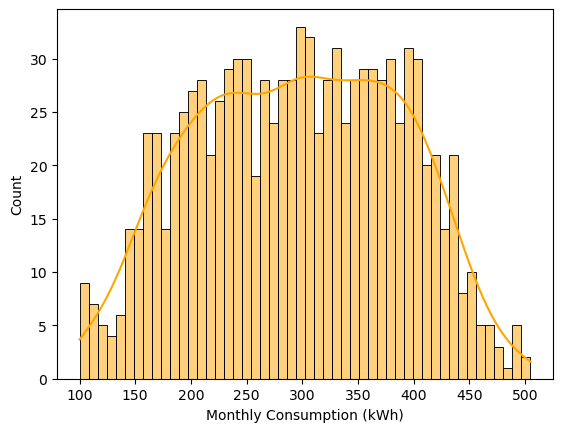

In [14]:
# univariate numerical column analysis 
sns.histplot(data=df,x="Monthly Consumption (kWh)",kde=True,bins=50,color="orange")

<Axes: xlabel='Avg Daily Usage (kWh)', ylabel='Count'>

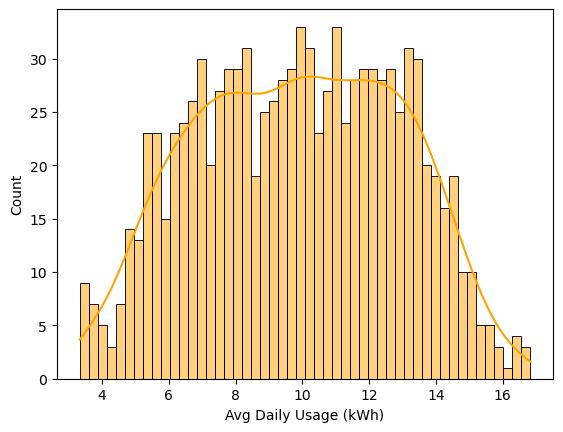

In [15]:
# univariate numerical column analysis 
sns.histplot(data=df,x="Avg Daily Usage (kWh)",kde=True,bins=50,color="orange")

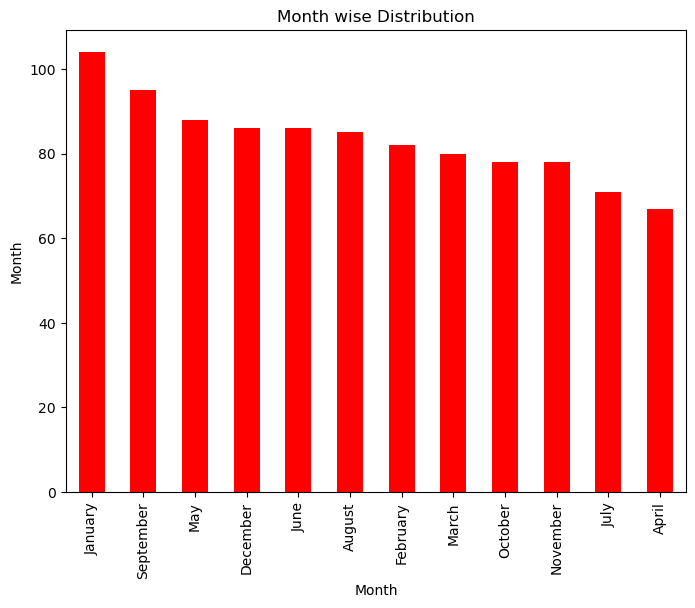

In [16]:
df['Month'].value_counts().plot.bar(color='red', figsize=(8, 6))
plt.title('Month wise Distribution')
plt.xlabel('Month')
plt.ylabel('Month')
plt.show()

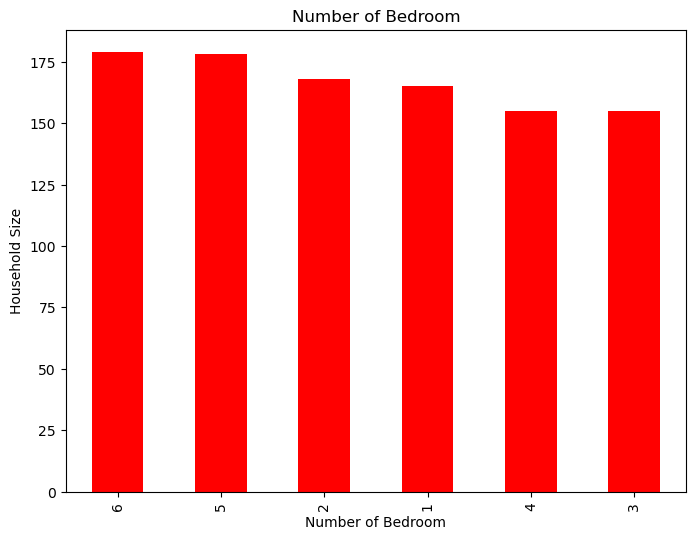

In [17]:
df['Household Size'].value_counts().plot.bar(color='red', figsize=(8, 6))
plt.title('Number of Bedroom')
plt.xlabel('Number of Bedroom')
plt.ylabel('Household Size')
plt.show()

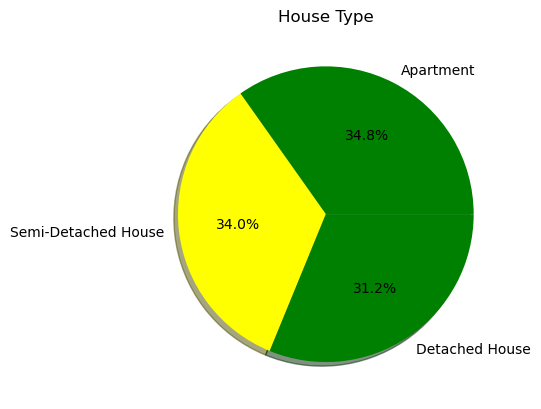

In [18]:
# univariate analysis of categorical column
val_count=df["House Type"].value_counts()
plt.pie(val_count,labels=val_count.index,autopct='%1.1f%%',shadow=True, colors=["green", "yellow"])
plt.title('House Type')
plt.show()

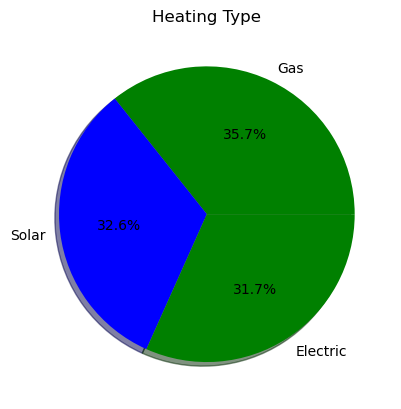

In [19]:
# univariate analysis of categorical column
val_count=df["Heating Type"].value_counts()
plt.pie(val_count,labels=val_count.index,autopct='%1.1f%%',shadow=True, colors=["green", "blue"])
plt.title('Heating Type')
plt.show()

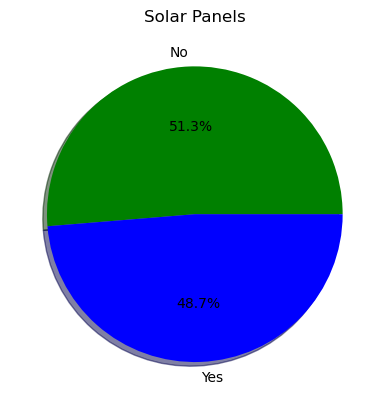

In [20]:
# univariate analysis of categorical column
val_count=df["Solar Panels"].value_counts()
plt.pie(val_count,labels=val_count.index,autopct='%1.1f%%',shadow=True, colors=["green", "blue"])
plt.title('Solar Panels')
plt.show()

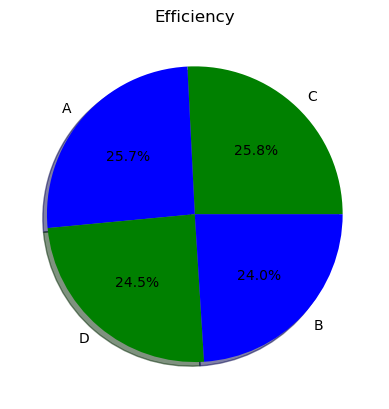

In [21]:
# univariate analysis of categorical column
val_count=df["Efficiency"].value_counts()
plt.pie(val_count,labels=val_count.index,autopct='%1.1f%%',shadow=True, colors=["green", "blue"])
plt.title('Efficiency')
plt.show()

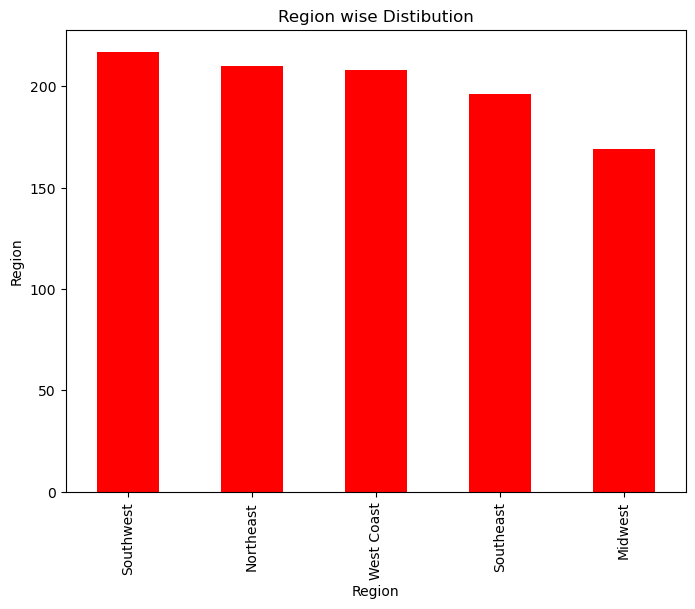

In [22]:
df['Region'].value_counts().plot.bar(color='red', figsize=(8, 6))
plt.title('Region wise Distibution')
plt.xlabel('Region')
plt.ylabel('Region')
plt.show()

<Axes: xlabel='Monthly Consumption (kWh)', ylabel='Appliances Count'>

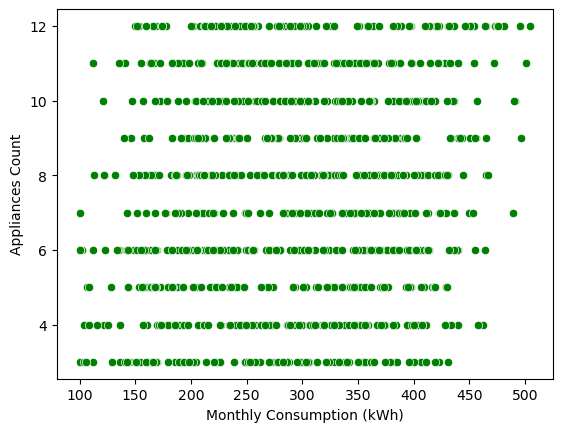

In [23]:
# bivariate analysis of numerical columnApplicantIncome    
sns.scatterplot(data=df,x="Monthly Consumption (kWh)",y="Appliances Count",color="green")

<Axes: xlabel='House Type', ylabel='Appliances Count'>

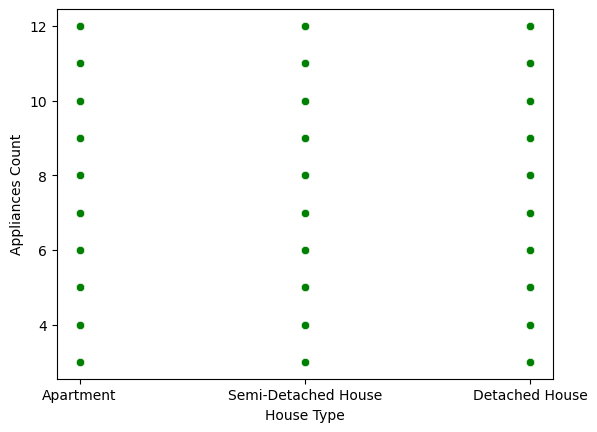

In [24]:
# bivariate analysis of numerical columnApplicantIncome        
sns.scatterplot(data=df,x="House Type",y="Appliances Count",color="green")

In [25]:
# checking and handling of outliers

def outliers_handling(df, col):
    sns.boxplot(df[col], color = "Red",saturation=0.8)
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    df.loc[df[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    df.loc[df[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value

    print("After handling of Outliers data:\n")
    print(df.head())

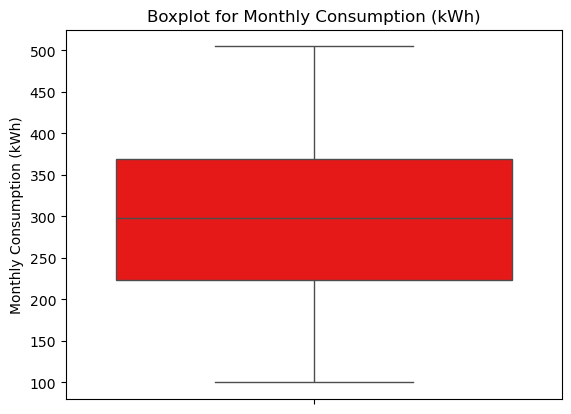

25% Quantile q1 = 223.5725
75% Quantile q3 = 369.095
IQR = 145.52250000000004

--------------------------------------------------------------------------------
Lower Tail = 5.288749999999936
Upper Tail = 587.3787500000001
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Monthly Consumption (kWh), Household Size, House Type, Heating Type, Appliances Count, Avg Daily Usage (kWh), Month, Region, Efficiency, Solar Panels]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   Monthly Consumption (kWh)  Household Size           House Type  \
0                     206.52               2            Apartment   
1                     383.01               4            Apartment   
2                     287.67               5  Semi-Detached House   
3                     191.48               4       Detached House   
4                     432.68         

In [26]:
# outlier handling for ApplicantIncome
outliers_handling(df,"Monthly Consumption (kWh)")

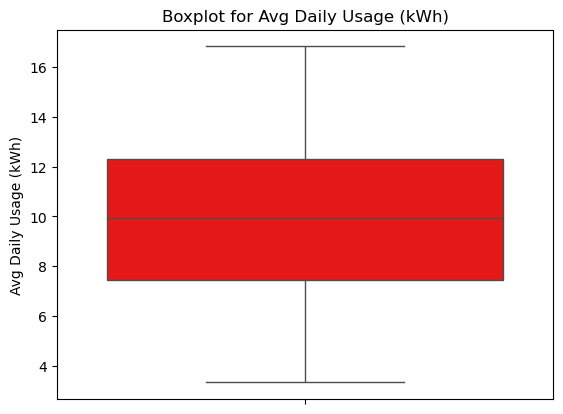

25% Quantile q1 = 7.455
75% Quantile q3 = 12.3025
IQR = 4.8475

--------------------------------------------------------------------------------
Lower Tail = 0.18374999999999986
Upper Tail = 19.57375
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Monthly Consumption (kWh), Household Size, House Type, Heating Type, Appliances Count, Avg Daily Usage (kWh), Month, Region, Efficiency, Solar Panels]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   Monthly Consumption (kWh)  Household Size           House Type  \
0                     206.52               2            Apartment   
1                     383.01               4            Apartment   
2                     287.67               5  Semi-Detached House   
3                     191.48               4       Detached House   
4                     432.68               6            Apa

In [27]:
# outlier handling for ApplicantIncome
outliers_handling(df,"Avg Daily Usage (kWh)")

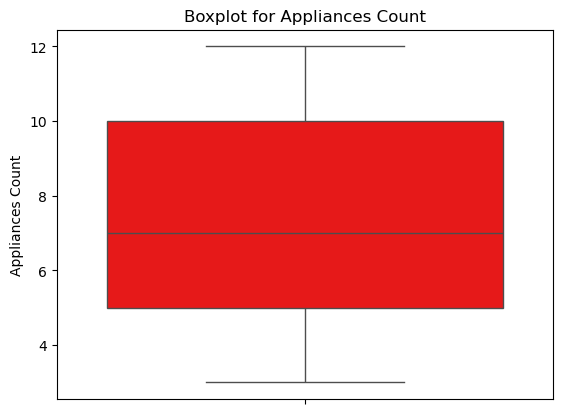

25% Quantile q1 = 5.0
75% Quantile q3 = 10.0
IQR = 5.0

--------------------------------------------------------------------------------
Lower Tail = -2.5
Upper Tail = 17.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Monthly Consumption (kWh), Household Size, House Type, Heating Type, Appliances Count, Avg Daily Usage (kWh), Month, Region, Efficiency, Solar Panels]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   Monthly Consumption (kWh)  Household Size           House Type  \
0                     206.52               2            Apartment   
1                     383.01               4            Apartment   
2                     287.67               5  Semi-Detached House   
3                     191.48               4       Detached House   
4                     432.68               6            Apartment   

  Heating Type  

In [28]:
# outlier handling for ApplicantIncome
outliers_handling(df,"Appliances Count")

In [29]:
# encoding categorical data

def encode_data(df):
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object', 'category']).columns:
        df[col] = le.fit_transform(df[col])

In [30]:
encode_data(df)
df

,Monthly Consumption (kWh),Household Size,House Type,Heating Type,Appliances Count,Avg Daily Usage (kWh),Month,Region,Efficiency,Solar Panels
0,206.52,2,0,0,11.0,6.88,8,0,0,1
1,383.01,4,0,1,3.0,12.77,11,3,3,0
2,287.67,5,2,1,8.0,9.59,2,3,3,1
3,191.48,4,1,0,3.0,6.38,3,2,1,1
4,432.68,6,0,0,12.0,14.42,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,111.70,1,1,2,11.0,3.72,5,3,3,1
996,291.63,3,2,0,5.0,9.72,11,3,3,1
997,231.68,3,0,0,11.0,7.72,3,1,2,0
998,335.73,5,0,1,7.0,11.19,7,3,2,1


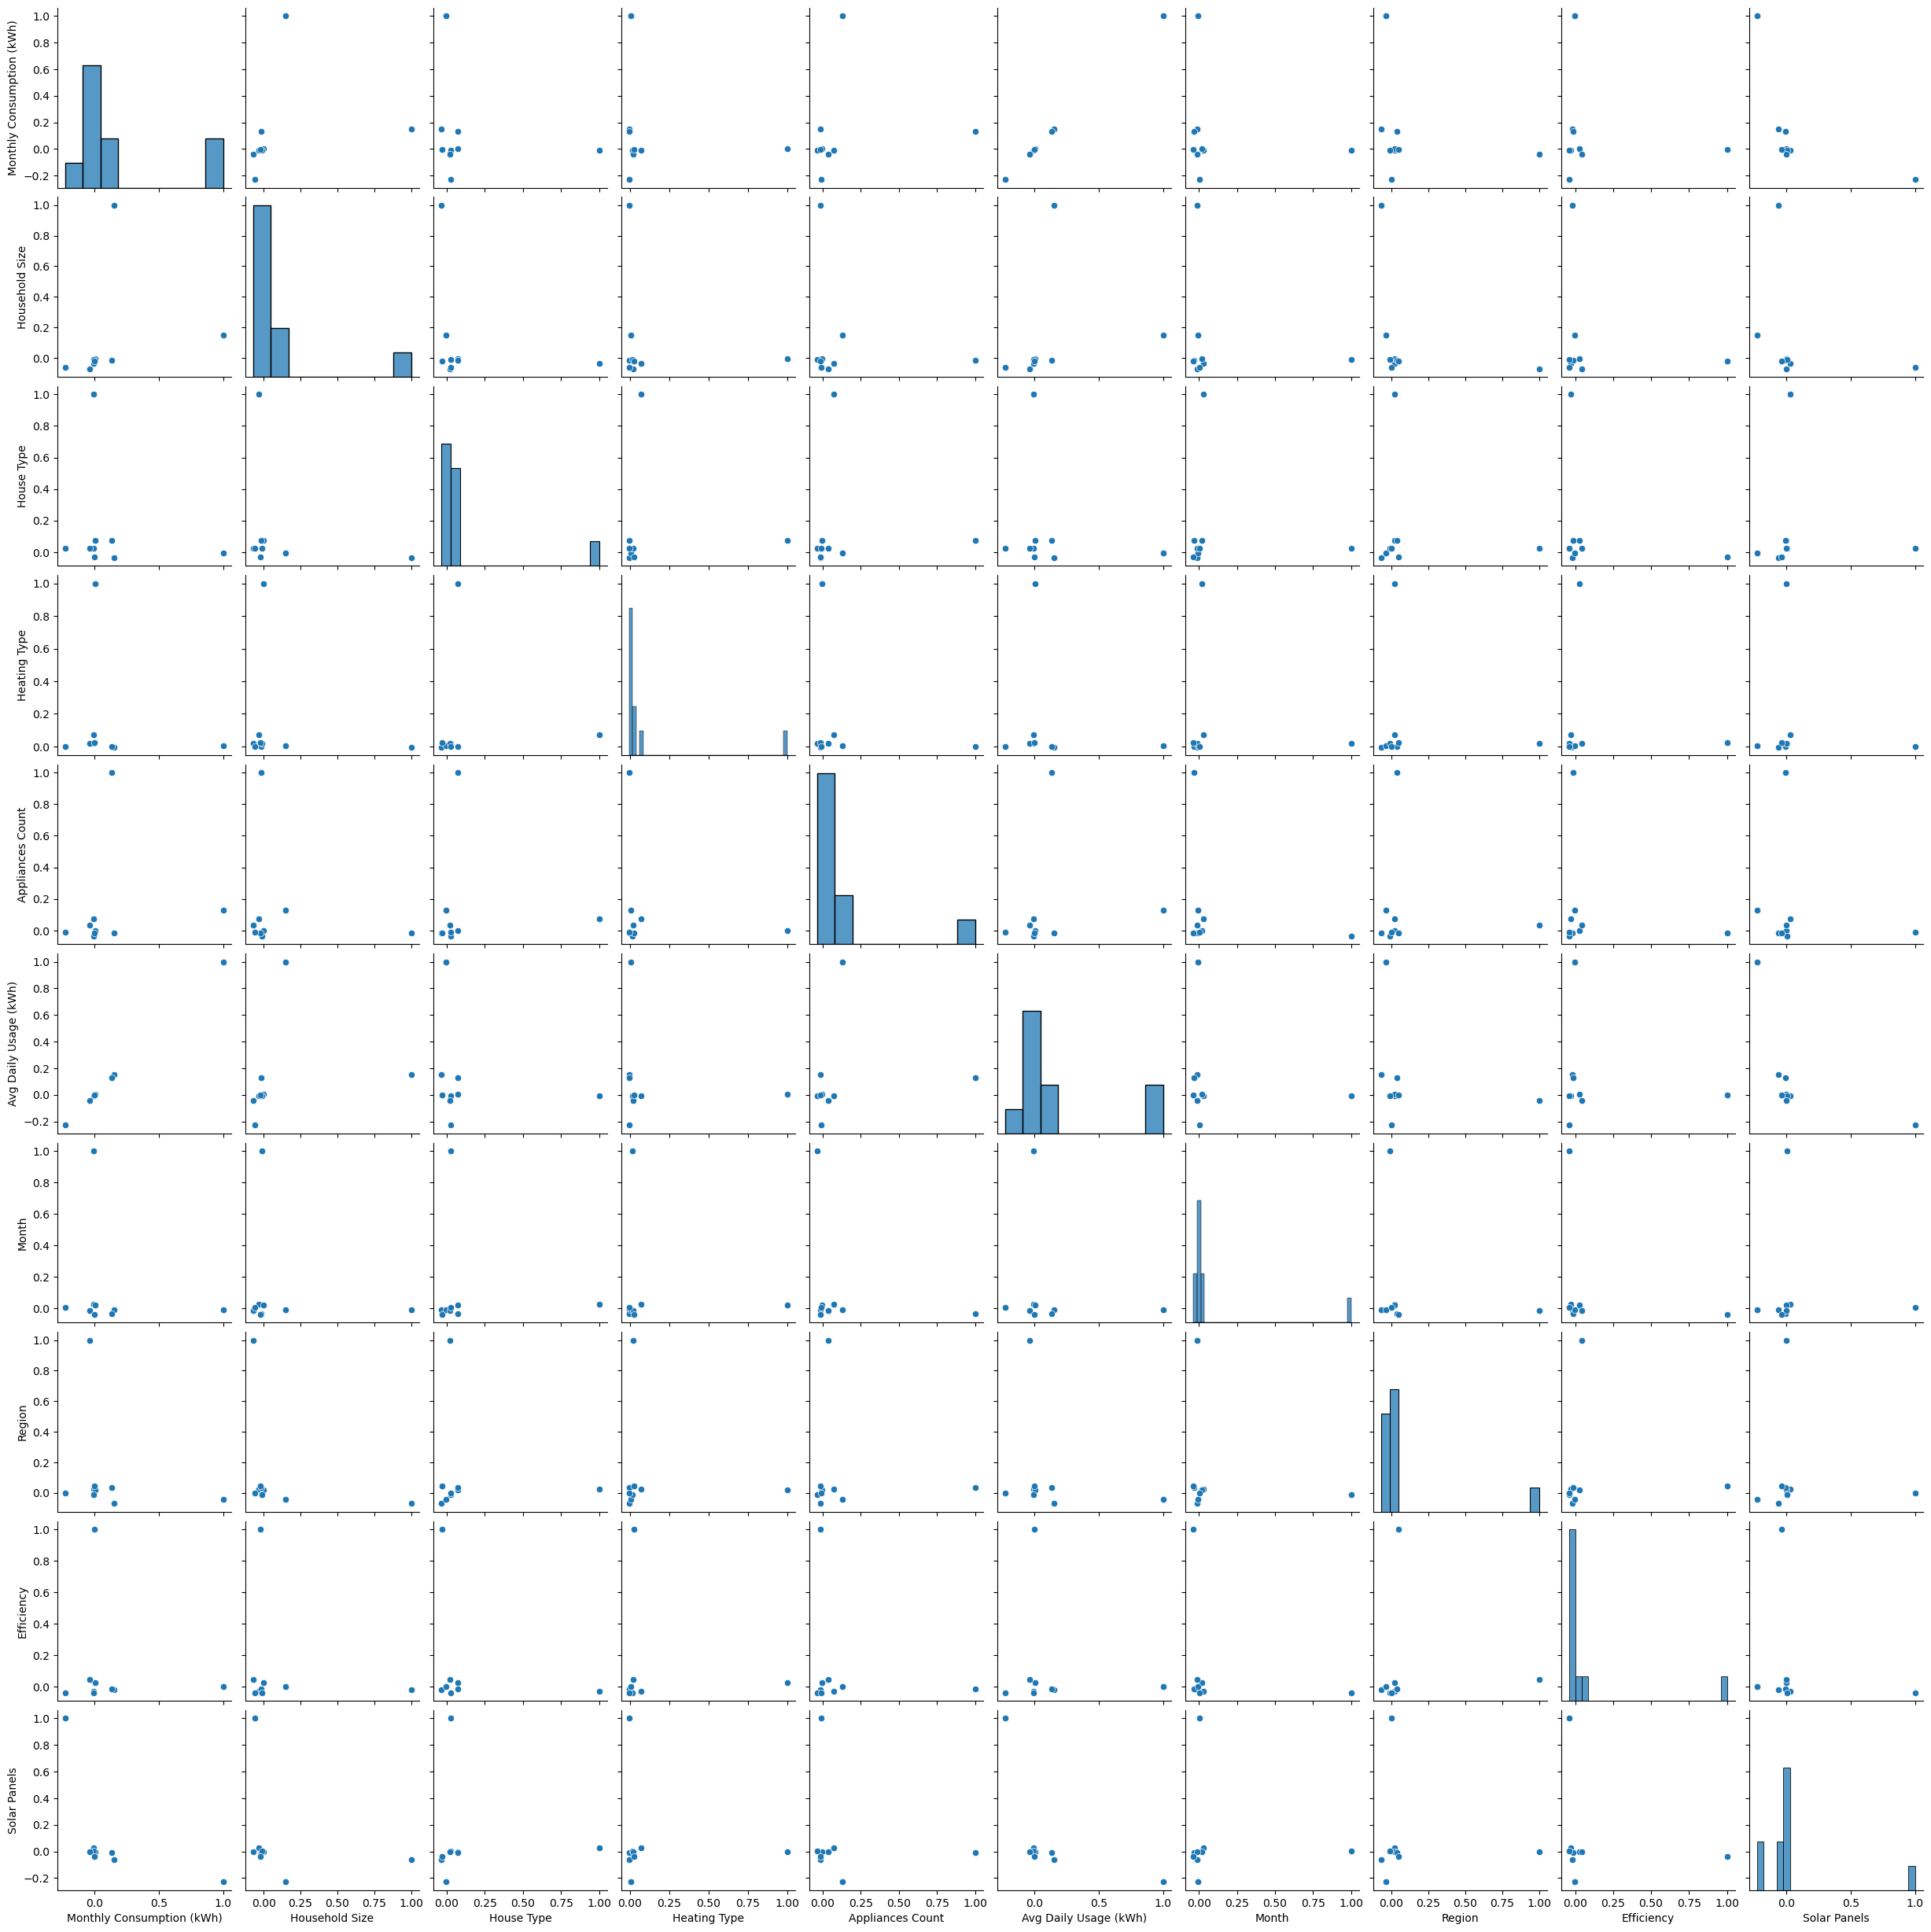

In [31]:
# visualization of correlation of numerical column
sns.pairplot(df.corr())

In [32]:
df1=df.iloc[:,:10]
df1

,Monthly Consumption (kWh),Household Size,House Type,Heating Type,Appliances Count,Avg Daily Usage (kWh),Month,Region,Efficiency,Solar Panels
0,206.52,2,0,0,11.0,6.88,8,0,0,1
1,383.01,4,0,1,3.0,12.77,11,3,3,0
2,287.67,5,2,1,8.0,9.59,2,3,3,1
3,191.48,4,1,0,3.0,6.38,3,2,1,1
4,432.68,6,0,0,12.0,14.42,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,111.70,1,1,2,11.0,3.72,5,3,3,1
996,291.63,3,2,0,5.0,9.72,11,3,3,1
997,231.68,3,0,0,11.0,7.72,3,1,2,0
998,335.73,5,0,1,7.0,11.19,7,3,2,1


In [33]:
vif_df = pd.DataFrame()
vif_df["Efficiency"] =df1.columns
vif_df
df1


,Monthly Consumption (kWh),Household Size,House Type,Heating Type,Appliances Count,Avg Daily Usage (kWh),Month,Region,Efficiency,Solar Panels
0,206.52,2,0,0,11.0,6.88,8,0,0,1
1,383.01,4,0,1,3.0,12.77,11,3,3,0
2,287.67,5,2,1,8.0,9.59,2,3,3,1
3,191.48,4,1,0,3.0,6.38,3,2,1,1
4,432.68,6,0,0,12.0,14.42,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,111.70,1,1,2,11.0,3.72,5,3,3,1
996,291.63,3,2,0,5.0,9.72,11,3,3,1
997,231.68,3,0,0,11.0,7.72,3,1,2,0
998,335.73,5,0,1,7.0,11.19,7,3,2,1


In [34]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
vif_df["VIF"] = vif_list
vif_df

,Efficiency,VIF
0,Monthly Consumption (kWh),1.227101e+07
1,Household Size,4.785407e+00
2,House Type,2.404968e+00
3,Heating Type,2.514390e+00
4,Appliances Count,6.953749e+00
5,Avg Daily Usage (kWh),1.227148e+07
6,Month,3.332750e+00
7,Region,3.041320e+00
8,Efficiency,2.609264e+00
9,Solar Panels,1.857373e+00


In [35]:
df.corr()

,Monthly Consumption (kWh),Household Size,House Type,Heating Type,Appliances Count,Avg Daily Usage (kWh),Month,Region,Efficiency,Solar Panels
Monthly Consumption (kWh),1.000000,0.150123,-0.006249,0.004698,0.130359,1.000000,-0.008761,-0.039875,-0.002295,-0.228761
Household Size,0.150123,1.000000,-0.035202,-0.002843,-0.015504,0.150081,-0.011554,-0.070130,-0.020637,-0.059857
House Type,-0.006249,-0.035202,1.000000,0.072284,0.074532,-0.006290,0.026642,0.023168,-0.029148,0.026283
Heating Type,0.004698,-0.002843,0.072284,1.000000,-0.001805,0.004737,0.018496,0.020871,0.026263,-0.000956
Appliances Count,0.130359,-0.015504,0.074532,-0.001805,1.000000,0.130399,-0.035006,0.036285,-0.012693,-0.009547
Avg Daily Usage (kWh),1.000000,0.150081,-0.006290,0.004737,0.130399,1.000000,-0.008703,-0.039911,-0.002294,-0.228791
Month,-0.008761,-0.011554,0.026642,0.018496,-0.035006,-0.008703,1.000000,-0.012494,-0.038939,0.003537
Region,-0.039875,-0.070130,0.023168,0.020871,0.036285,-0.039911,-0.012494,1.000000,0.045837,-0.000569
Efficiency,-0.002295,-0.020637,-0.029148,0.026263,-0.012693,-0.002294,-0.038939,0.045837,1.000000,-0.039516
Solar Panels,-0.228761,-0.059857,0.026283,-0.000956,-0.009547,-0.228791,0.003537,-0.000569,-0.039516,1.000000


<Axes: >

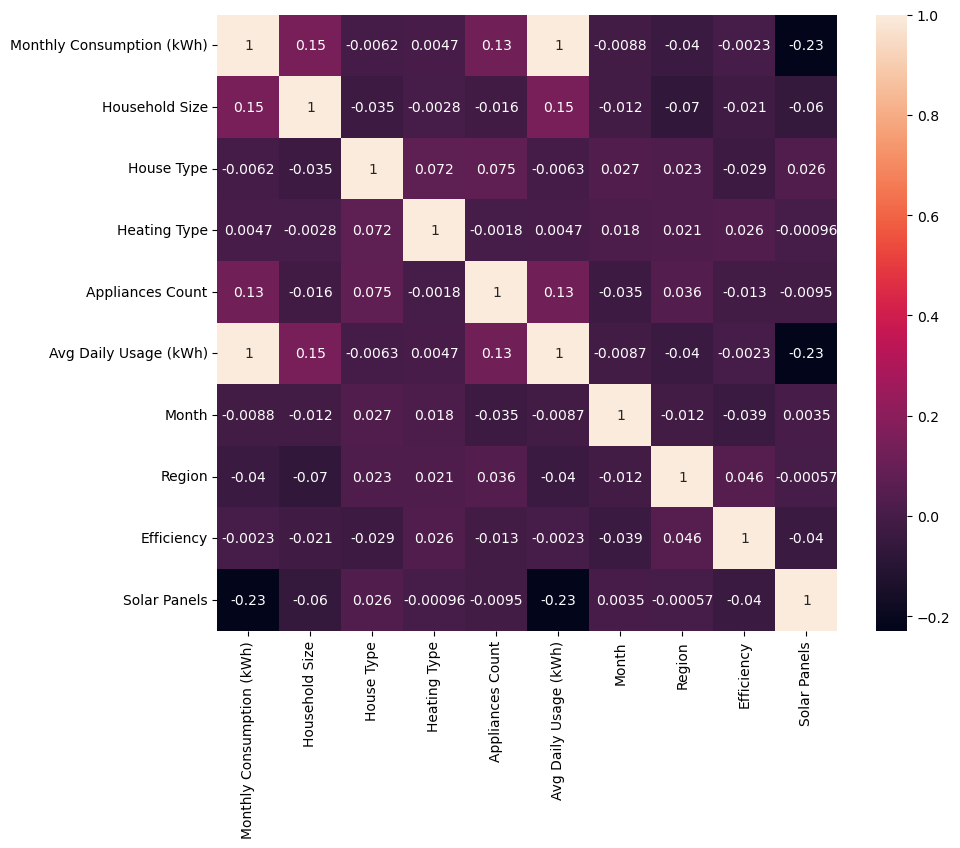

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True)

In [37]:
pd.value_counts(df["Efficiency"])

Efficiency
2    258
0    257
3    245
1    240
Name: count, dtype: int64

In [38]:
df1=df.drop(columns=['Efficiency'])
df1

,Monthly Consumption (kWh),Household Size,House Type,Heating Type,Appliances Count,Avg Daily Usage (kWh),Month,Region,Solar Panels
0,206.52,2,0,0,11.0,6.88,8,0,1
1,383.01,4,0,1,3.0,12.77,11,3,0
2,287.67,5,2,1,8.0,9.59,2,3,1
3,191.48,4,1,0,3.0,6.38,3,2,1
4,432.68,6,0,0,12.0,14.42,0,0,0
...,...,...,...,...,...,...,...,...,...
995,111.70,1,1,2,11.0,3.72,5,3,1
996,291.63,3,2,0,5.0,9.72,11,3,1
997,231.68,3,0,0,11.0,7.72,3,1,0
998,335.73,5,0,1,7.0,11.19,7,3,1


<Axes: xlabel='Efficiency', ylabel='count'>

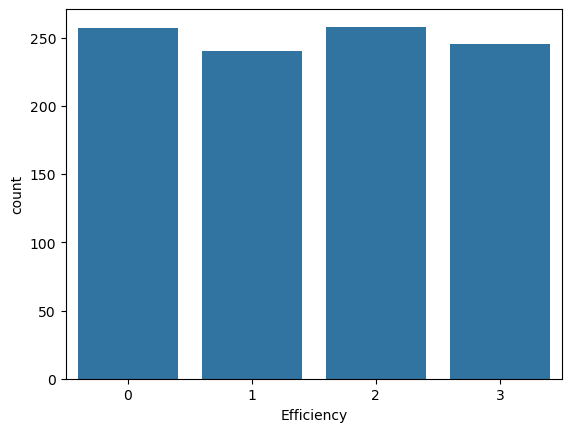

In [39]:
sns.countplot(x=df["Efficiency"])

In [40]:
# declaring dependent and independent variable
x=df.drop(columns=['Efficiency'])
y=df["Efficiency"]

In [41]:
# Training and testing the dependent variable and independent variable by 80:20
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

#Model Training 
# 1 Logistic regression 

In [42]:
logistic_reg=LogisticRegression(multi_class='ovr')
logistic_reg

LogisticRegression(multi_class='ovr')

In [43]:
logistic_reg_model=logistic_reg.fit(xtrain,ytrain)

In [44]:
# Evaluation of LR
#Training Data

In [45]:
ytrain_predict = logistic_reg_model.predict(xtrain)

In [46]:
accuracy = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy Score = {accuracy}")
print("*"*60)

con_mat = multilabel_confusion_matrix(ytrain,ytrain_predict)
print(f"Confusion Matrix : \n{con_mat}")
print("*"*60)

clss_report = classification_report(ytrain,ytrain_predict)
print(f"Classification report : \n{clss_report}")
print("*"*60)

Accuracy Score = 0.3075
************************************************************
Confusion Matrix : 
[[[408 186]
  [122  84]]

 [[493 115]
  [143  49]]

 [[423 174]
  [125  78]]

 [[522  79]
  [164  35]]]
************************************************************
Classification report : 
              precision    recall  f1-score   support

           0       0.31      0.41      0.35       206
           1       0.30      0.26      0.28       192
           2       0.31      0.38      0.34       203
           3       0.31      0.18      0.22       199

    accuracy                           0.31       800
   macro avg       0.31      0.31      0.30       800
weighted avg       0.31      0.31      0.30       800

************************************************************


In [47]:
# Testing data

In [48]:
ytest_pred = logistic_reg_model.predict(xtest)

In [49]:

accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy Score = {accuracy}")
print("*"*60)

con_mat = multilabel_confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{con_mat}")
print("*"*60)

clss_report = classification_report(ytest,ytest_pred)
print(f"Classification report : \n{clss_report}")
print("*"*60)


Accuracy Score = 0.23
************************************************************
Confusion Matrix : 
[[[ 96  53]
  [ 39  12]]

 [[118  34]
  [ 37  11]]

 [[106  39]
  [ 39  16]]

 [[126  28]
  [ 39   7]]]
************************************************************
Classification report : 
              precision    recall  f1-score   support

           0       0.18      0.24      0.21        51
           1       0.24      0.23      0.24        48
           2       0.29      0.29      0.29        55
           3       0.20      0.15      0.17        46

    accuracy                           0.23       200
   macro avg       0.23      0.23      0.23       200
weighted avg       0.23      0.23      0.23       200

************************************************************


In [50]:
x.columns

Index(['Monthly Consumption (kWh)', 'Household Size', 'House Type',
       'Heating Type', 'Appliances Count', 'Avg Daily Usage (kWh)', 'Month',
       'Region', 'Solar Panels'],
      dtype='object')

# 2.Decision Tree

In [51]:
dt_clf = DecisionTreeClassifier(ccp_alpha=0.0)
dt_clf_model = dt_clf.fit(xtrain,ytrain) 
dt_clf_model

DecisionTreeClassifier()

Accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       192
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       199

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Axes(0.125,0.11;0.62x0.77)


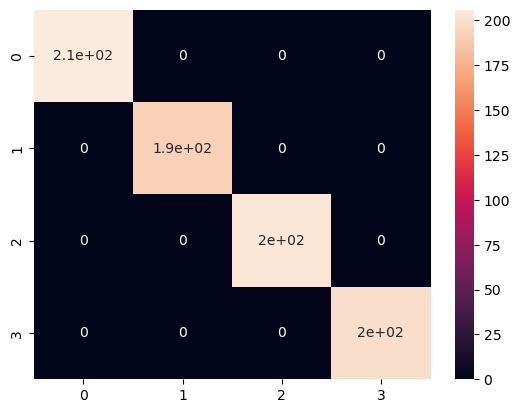

In [52]:
#training

ytrain_pred = dt_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.26
              precision    recall  f1-score   support

           0       0.32      0.35      0.33        51
           1       0.31      0.27      0.29        48
           2       0.26      0.25      0.26        55
           3       0.15      0.15      0.15        46

    accuracy                           0.26       200
   macro avg       0.26      0.26      0.26       200
weighted avg       0.26      0.26      0.26       200

Axes(0.125,0.11;0.62x0.77)


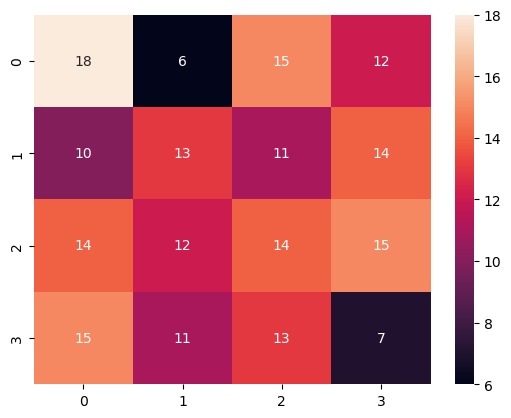

In [53]:
ytest_pred = dt_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [54]:
class_names = [str(c) for c in dt_clf_model.classes_]


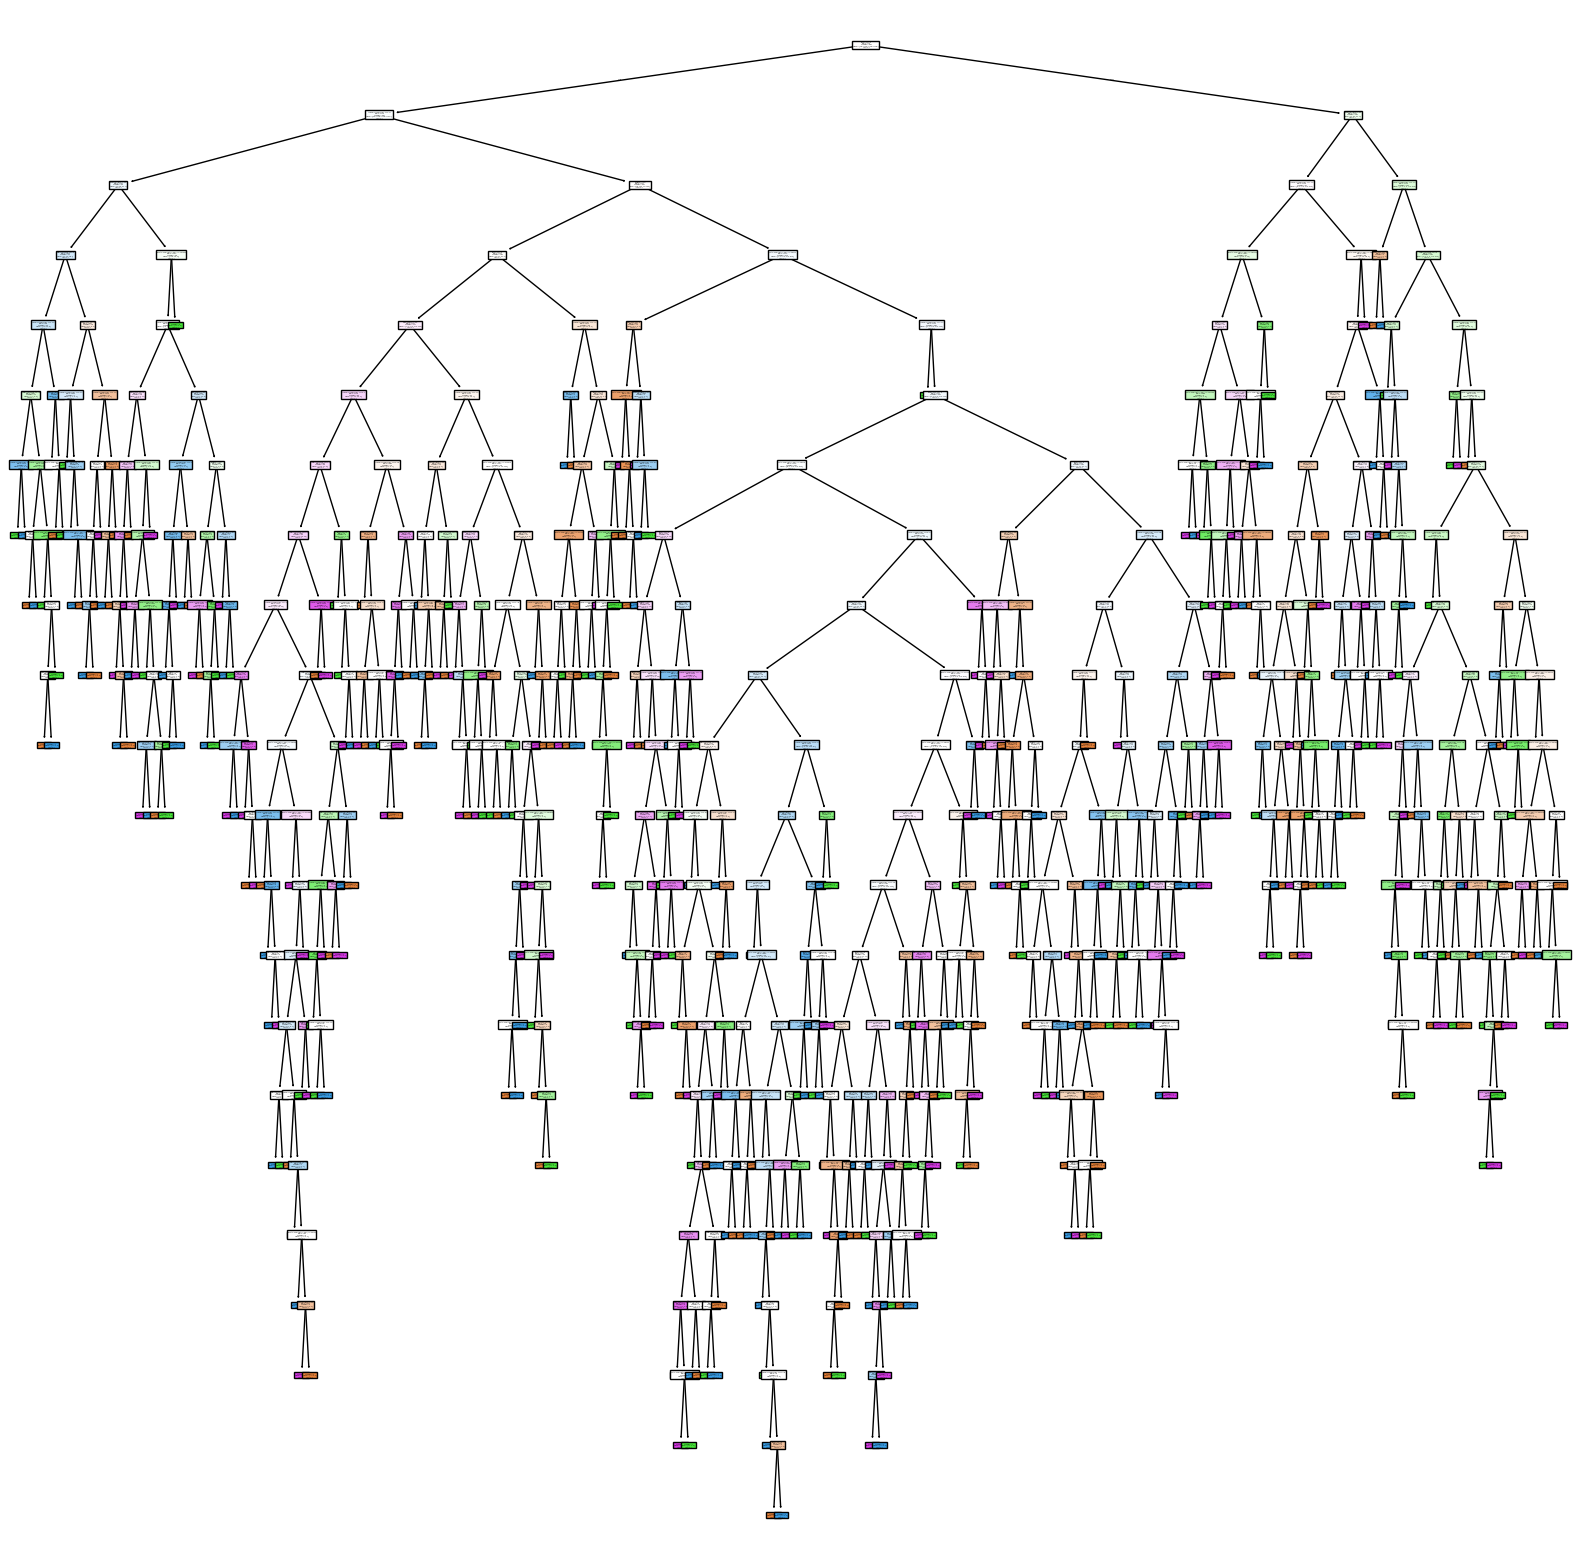

In [55]:
plt.figure(figsize=(20, 20))
plot_tree(
    dt_clf_model,
    feature_names=x.columns,  
    class_names=class_names,  
    filled=True
)
plt.show()

In [56]:
#### Decision tree with hyperparameter tunning

In [57]:
hyperparameters = {"criterion" : ["gini","entropy","log_loss"],  # regression - “squared_error”, “friedman_mse”, “absolute_error”, “poisson”
                  "max_depth" : np.arange(2,11),
                  "min_samples_split" : np.arange(2,11),
                  "min_samples_leaf" : np.arange(2, 12) }

In [58]:
rscv_dt = RandomizedSearchCV(dt_clf_model, hyperparameters, cv=5)
rscv_dt = rscv_dt.fit(xtrain,ytrain)
rscv_dt
rscv_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10,
                       min_samples_split=6)

In [59]:
rscv_dt =DecisionTreeClassifier(criterion='log_loss', max_depth=3, min_samples_leaf=5,
                       min_samples_split=5)
rscv_dt_clf_model=rscv_dt.fit(xtrain,ytrain)
rscv_dt_clf_model

DecisionTreeClassifier(criterion='log_loss', max_depth=3, min_samples_leaf=5,
                       min_samples_split=5)

In [60]:
rscv_dt_clf_model = rscv_dt.fit(xtrain,ytrain)
rscv_dt_clf_model

DecisionTreeClassifier(criterion='log_loss', max_depth=3, min_samples_leaf=5,
                       min_samples_split=5)

Accuracy = 0.31375
              precision    recall  f1-score   support

           0       0.28      0.80      0.41       206
           1       0.45      0.21      0.29       192
           2       0.36      0.19      0.25       203
           3       0.57      0.04      0.08       199

    accuracy                           0.31       800
   macro avg       0.41      0.31      0.26       800
weighted avg       0.41      0.31      0.26       800

Axes(0.125,0.11;0.62x0.77)


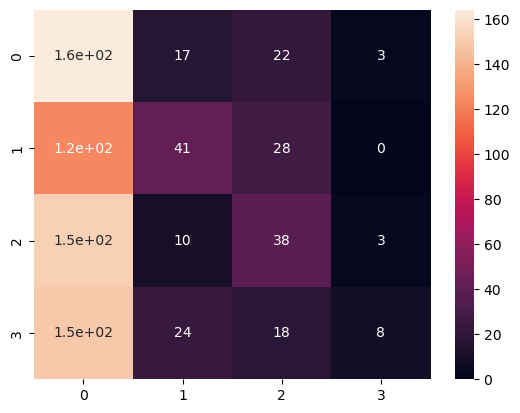

In [61]:
#training

ytrain_pred = rscv_dt_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.31375
              precision    recall  f1-score   support

           0       0.28      0.80      0.41       206
           1       0.45      0.21      0.29       192
           2       0.36      0.19      0.25       203
           3       0.57      0.04      0.08       199

    accuracy                           0.31       800
   macro avg       0.41      0.31      0.26       800
weighted avg       0.41      0.31      0.26       800

Axes(0.125,0.11;0.62x0.77)


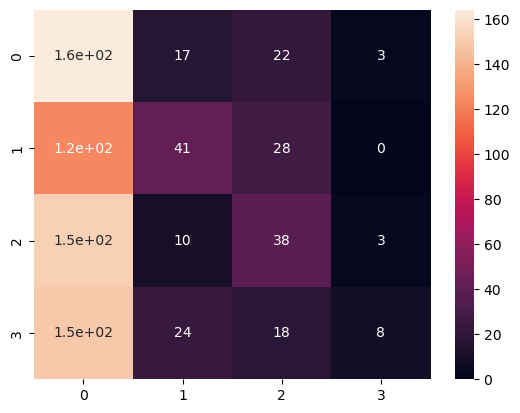

In [62]:
#training

ytrain_pred = rscv_dt_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.23
              precision    recall  f1-score   support

           0       0.25      0.75      0.38        51
           1       0.16      0.06      0.09        48
           2       0.18      0.09      0.12        55
           3       0.00      0.00      0.00        46

    accuracy                           0.23       200
   macro avg       0.15      0.22      0.15       200
weighted avg       0.15      0.23      0.15       200

Axes(0.125,0.11;0.62x0.77)


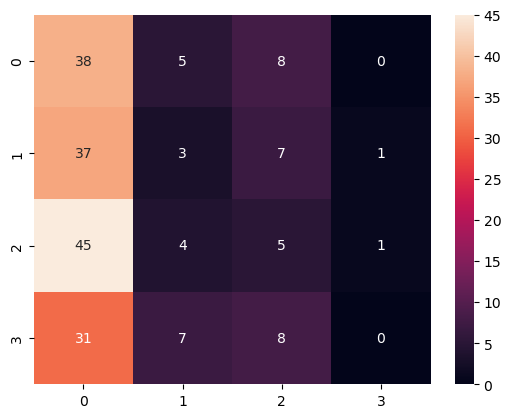

In [63]:
ytest_pred = rscv_dt_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [64]:
feature_names = x.columns

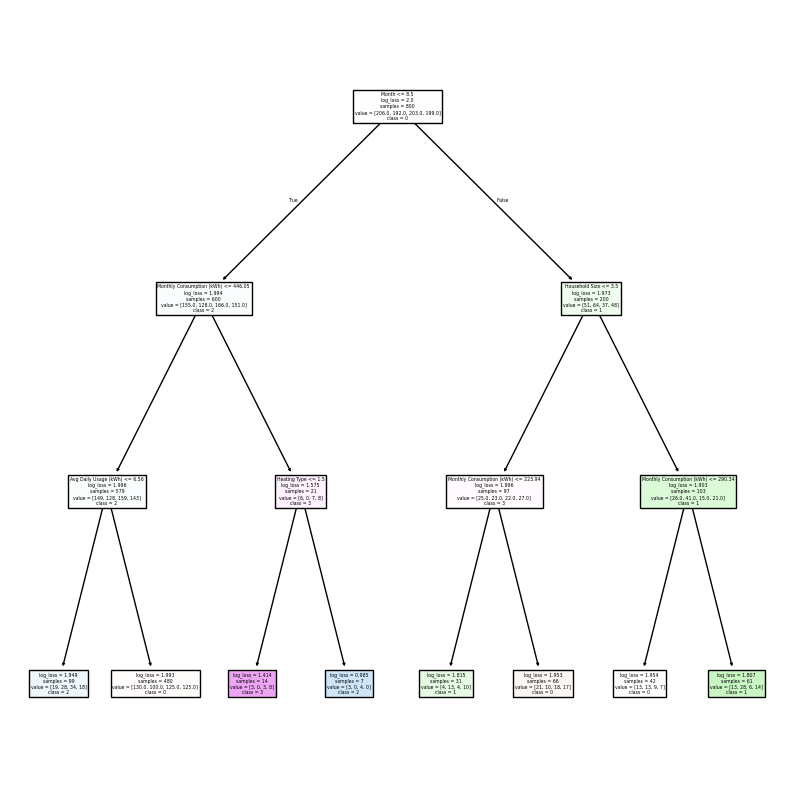

In [65]:
plt.figure(figsize=(10, 10))
plot_tree(
    rscv_dt_clf_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
)
plt.show()

In [66]:
### Best features by feature importance

In [67]:
feature_imporatance_df = pd.DataFrame(rscv_dt_clf_model.feature_importances_)
feature_imporatance_df

,0
0,0.430398
1,0.110954
2,0.000000
3,0.139257
4,0.000000
5,0.129378
6,0.190013
7,0.000000
8,0.000000


In [68]:
feature_imporatance_df["Features"] = x.columns

In [69]:
feature_imporatance_df.rename({0:"Value"}, axis = 1, inplace=True)
feature_imporatance_df

,Value,Features
0,0.430398,Monthly Consumption (kWh)
1,0.110954,Household Size
2,0.000000,House Type
3,0.139257,Heating Type
4,0.000000,Appliances Count
5,0.129378,Avg Daily Usage (kWh)
6,0.190013,Month
7,0.000000,Region
8,0.000000,Solar Panels


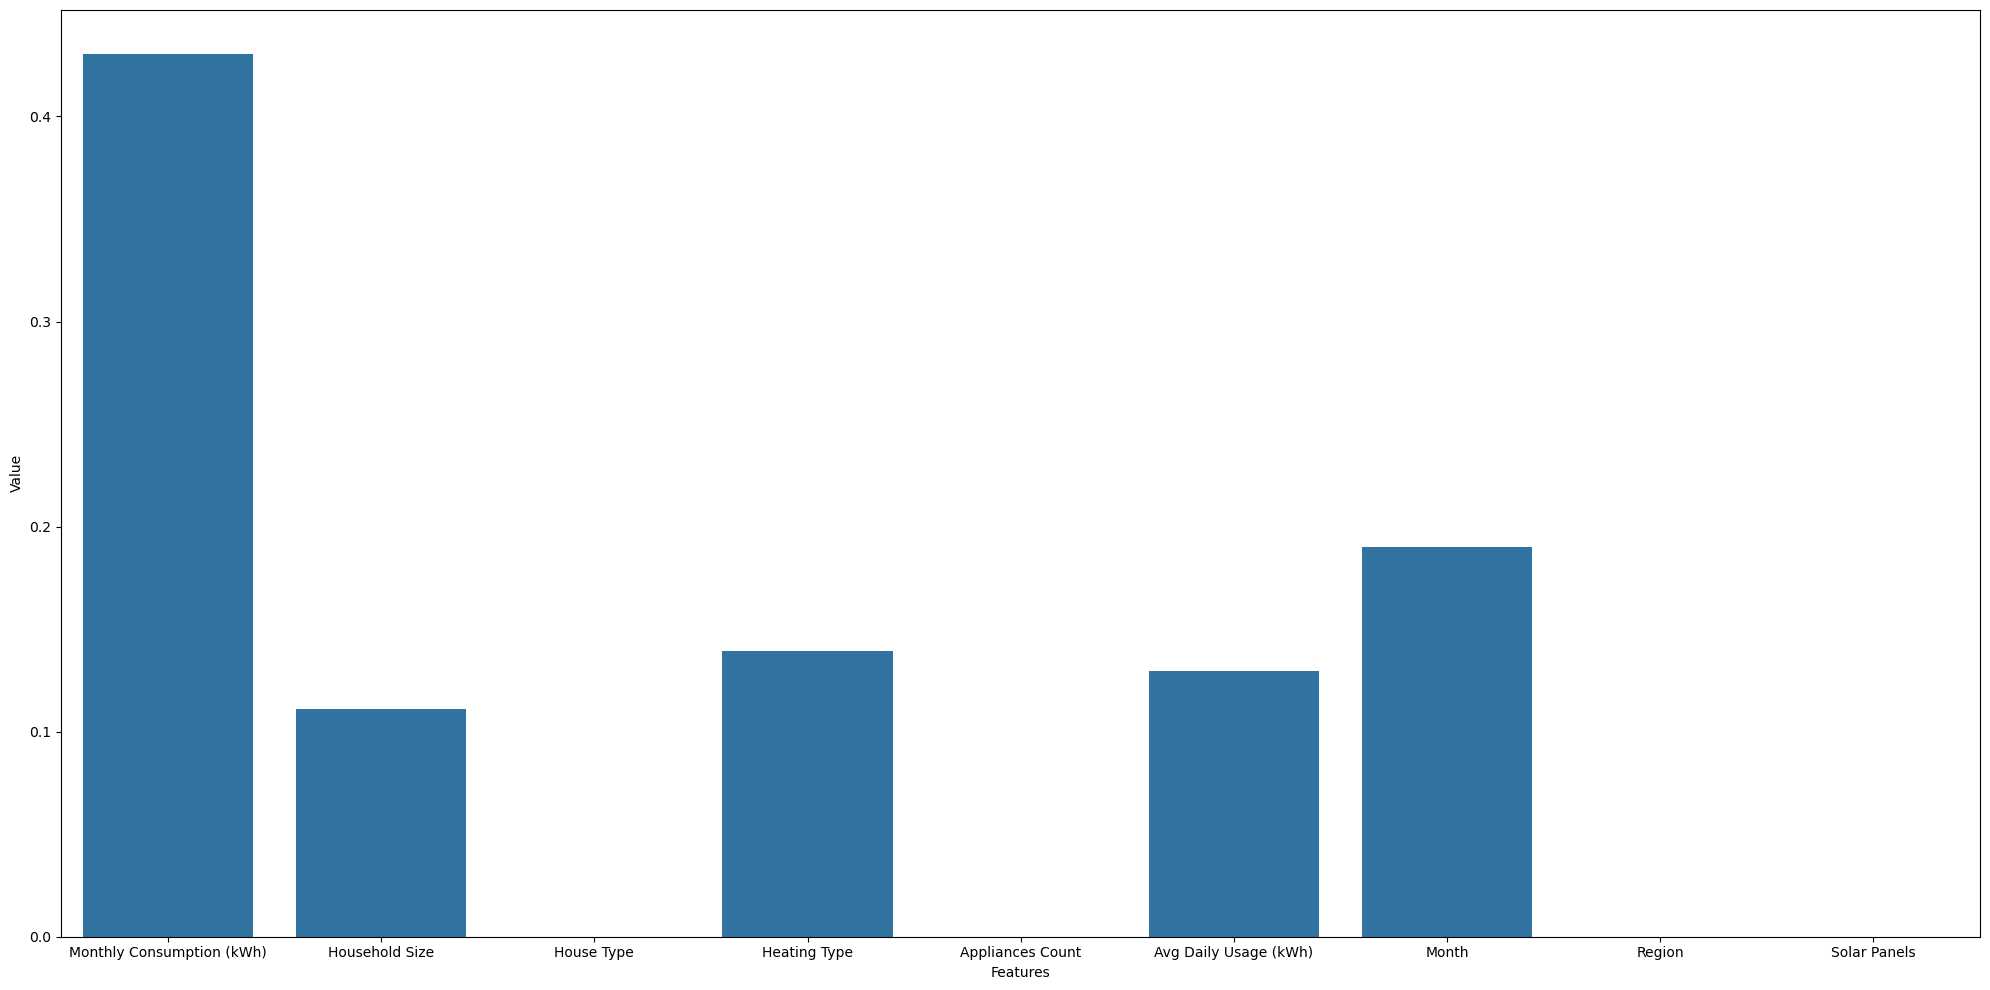

In [70]:
plt.figure(figsize=(20,10))
sns.barplot(x= feature_imporatance_df["Features"], y =feature_imporatance_df["Value"])
plt.tight_layout()

### 3  Random Forest

In [71]:
rf_clf = RandomForestClassifier()
rf_clf

RandomForestClassifier()

In [72]:
rf_clf_model = rf_clf.fit(xtrain,ytrain)
rf_clf_model

RandomForestClassifier()

Accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       192
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       199

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Axes(0.125,0.11;0.62x0.77)


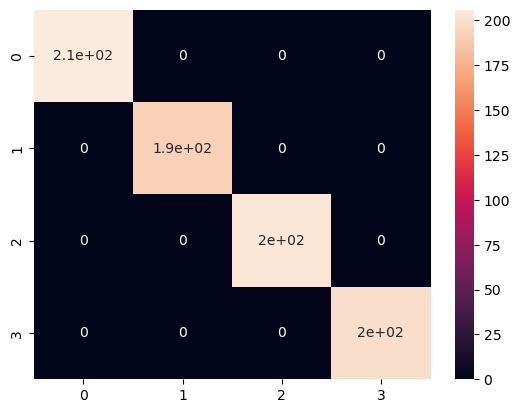

In [73]:
#training

ytrain_pred = rf_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.275
              precision    recall  f1-score   support

           0       0.24      0.27      0.26        51
           1       0.25      0.27      0.26        48
           2       0.31      0.27      0.29        55
           3       0.31      0.28      0.30        46

    accuracy                           0.28       200
   macro avg       0.28      0.28      0.28       200
weighted avg       0.28      0.28      0.28       200

Axes(0.125,0.11;0.62x0.77)


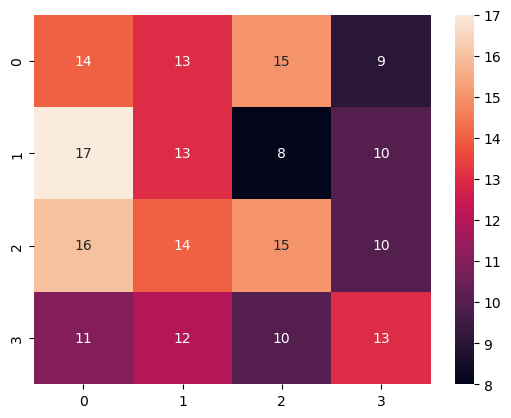

In [74]:
#training
ytest_pred = rf_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [75]:
### Randomforest with hyperparameter tunning

In [76]:
hyp = {"criterion" : ["gini","entropy","log_loss"],  # regression - “squared_error”, “friedman_mse”, “absolute_error”, “poisson”
       "max_depth" : np.arange(2,11),
       "min_samples_split" : np.arange(2,11),
       "min_samples_leaf" : np.arange(2, 12),
       "n_estimators" : np.arange(10, 101)
}

In [77]:
rscv_rf = RandomizedSearchCV(rf_clf_model, hyp, cv = 5)
rscv_rf = rscv_rf.fit(xtrain, ytrain)
rscv_rf.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=4,
                       n_estimators=41)

In [78]:
rscv_rf = RandomForestClassifier(criterion='log_loss', max_depth=6, min_samples_leaf=11,
                       min_samples_split=4, n_estimators=17)
rscv_rf

RandomForestClassifier(criterion='log_loss', max_depth=6, min_samples_leaf=11,
                       min_samples_split=4, n_estimators=17)

In [79]:
rscv_rf_clf = RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       min_samples_split=9, n_estimators=37)

rscv_rf_clf_model = rscv_rf_clf.fit(xtrain,ytrain)
rscv_rf_clf_model

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       min_samples_split=9, n_estimators=37)

Accuracy = 0.59
              precision    recall  f1-score   support

           0       0.55      0.67      0.60       206
           1       0.56      0.54      0.55       192
           2       0.60      0.63      0.61       203
           3       0.68      0.53      0.59       199

    accuracy                           0.59       800
   macro avg       0.60      0.59      0.59       800
weighted avg       0.60      0.59      0.59       800

Axes(0.125,0.11;0.62x0.77)


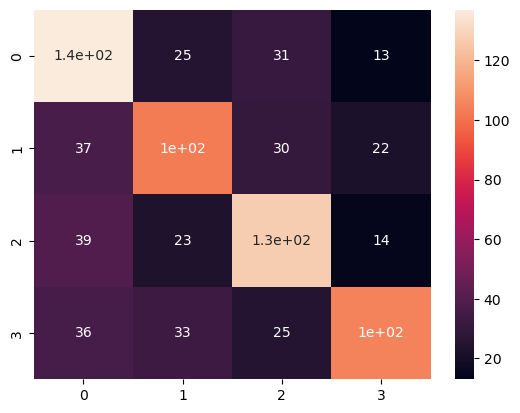

In [80]:
#training

ytrain_pred = rscv_rf_clf_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.245
              precision    recall  f1-score   support

           0       0.30      0.45      0.36        51
           1       0.17      0.17      0.17        48
           2       0.21      0.16      0.18        55
           3       0.26      0.20      0.23        46

    accuracy                           0.24       200
   macro avg       0.24      0.24      0.23       200
weighted avg       0.24      0.24      0.23       200

Axes(0.125,0.11;0.62x0.77)


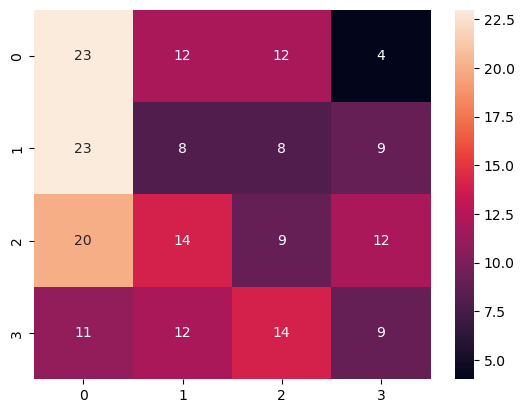

In [81]:
#training
ytest_pred = rscv_rf_clf_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

 4.AdaBoost

In [82]:
# Initialize the AdaBoost Classifier
ad_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ad_classifier

AdaBoostClassifier(n_estimators=100, random_state=42)

In [83]:
# Fit the AdaBoost Classifier
ad_classifier_model=ad_classifier.fit(xtrain ,ytrain)

Accuracy = 0.395
              precision    recall  f1-score   support

           0       0.39      0.46      0.42       206
           1       0.43      0.38      0.40       192
           2       0.40      0.42      0.41       203
           3       0.36      0.31      0.33       199

    accuracy                           0.40       800
   macro avg       0.40      0.39      0.39       800
weighted avg       0.40      0.40      0.39       800

Axes(0.125,0.11;0.62x0.77)


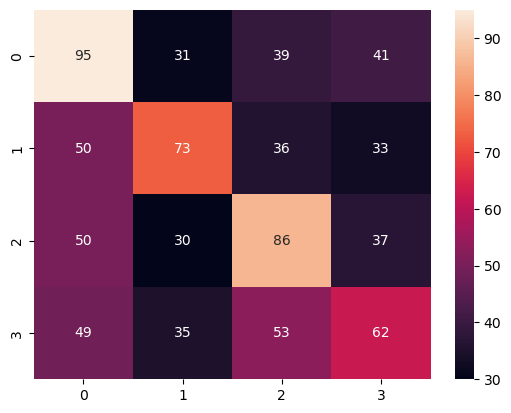

In [84]:
#Evaluation of Testing Data
#training

ytrain_pred = ad_classifier_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.225
              precision    recall  f1-score   support

           0       0.29      0.39      0.34        51
           1       0.20      0.21      0.20        48
           2       0.21      0.16      0.18        55
           3       0.15      0.13      0.14        46

    accuracy                           0.23       200
   macro avg       0.21      0.22      0.22       200
weighted avg       0.22      0.23      0.22       200

Axes(0.125,0.11;0.62x0.77)


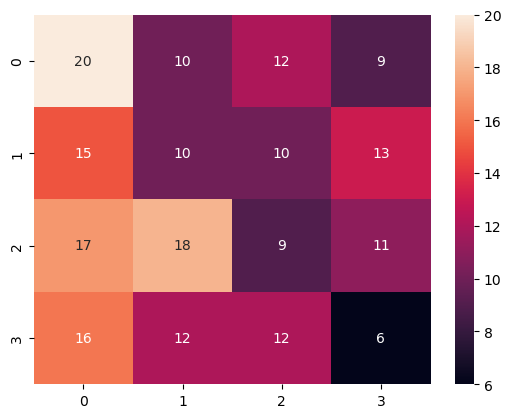

In [85]:
#training
ytest_pred = ad_classifier_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [86]:
### AdaBoost with hyperparameter tunning

In [87]:
# Hyperparameter Tuning for AdaBoost

hyp = {
    "n_estimators": np.arange(10, 201, 10),  # Number of weak learners
    "learning_rate": np.linspace(0.01, 2, 50),  # Learning rate
    "algorithm": ["SAMME", "SAMME.R"],  # Algorithms for AdaBoost
}

In [88]:
# Randomized Search Cross-Validation

rscv_adaboost = RandomizedSearchCV(ad_classifier, hyp, cv=5, random_state=42, n_iter=50, scoring="accuracy")
rscv_adaboost = rscv_adaboost.fit(xtrain, ytrain)

In [89]:
# Best Parameters

print("Best Parameters from RandomizedSearchCV:")
rscv_adaboost.best_params_

Best Parameters from RandomizedSearchCV:


{'n_estimators': 150,
 'learning_rate': 0.49734693877551023,
 'algorithm': 'SAMME'}

In [90]:
# Best AdaBoost Classifier

best_adaboost = rscv_adaboost.best_estimator_
best_adaboost_model = best_adaboost.fit(xtrain, ytrain)

In [91]:
# Training Predictions and Evaluation for Tuned Model
ytrain_pred = best_adaboost_model.predict(xtrain)

Accuracy = 0.395
              precision    recall  f1-score   support

           0       0.39      0.46      0.42       206
           1       0.43      0.38      0.40       192
           2       0.40      0.42      0.41       203
           3       0.36      0.31      0.33       199

    accuracy                           0.40       800
   macro avg       0.40      0.39      0.39       800
weighted avg       0.40      0.40      0.39       800

Axes(0.125,0.11;0.62x0.77)


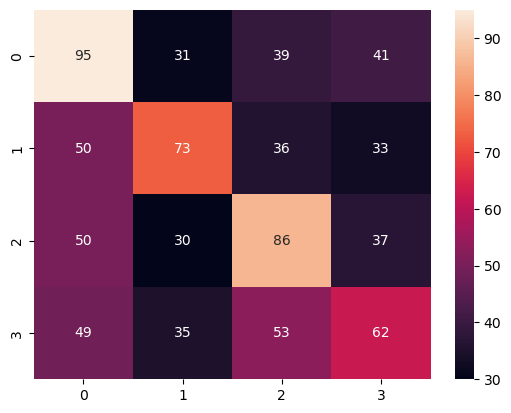

In [92]:
#training

ytrain_pred = ad_classifier_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.225
              precision    recall  f1-score   support

           0       0.29      0.39      0.34        51
           1       0.20      0.21      0.20        48
           2       0.21      0.16      0.18        55
           3       0.15      0.13      0.14        46

    accuracy                           0.23       200
   macro avg       0.21      0.22      0.22       200
weighted avg       0.22      0.23      0.22       200

Axes(0.125,0.11;0.62x0.77)


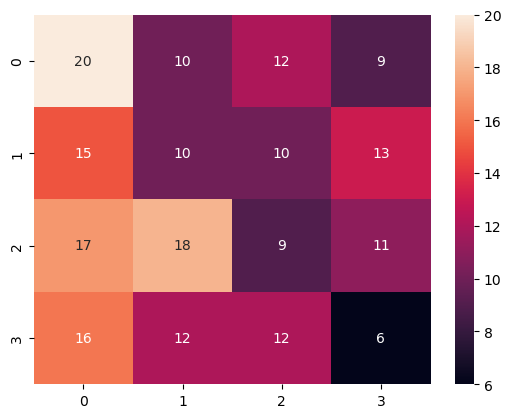

In [93]:
#training
ytest_pred = ad_classifier_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [94]:
#5.Gradient Boost

In [95]:
gb_Classifier=GradientBoostingClassifier(random_state=42)
gb_Classifier

GradientBoostingClassifier(random_state=42)

In [96]:
#fit the AdaBoost Classifier
gb_Classifier_model=gb_Classifier.fit(xtrain,ytrain)

Accuracy = 0.78625
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       206
           1       0.83      0.73      0.78       192
           2       0.74      0.82      0.78       203
           3       0.85      0.77      0.81       199

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800

Axes(0.125,0.11;0.62x0.77)


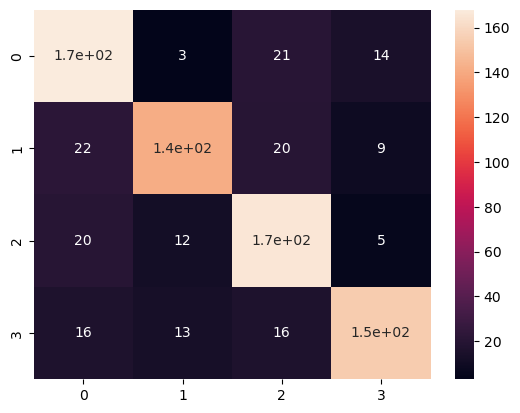

In [97]:
#Evaluation of Testing Data
#training

ytrain_pred = gb_Classifier_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.265
              precision    recall  f1-score   support

           0       0.35      0.43      0.39        51
           1       0.22      0.27      0.24        48
           2       0.23      0.16      0.19        55
           3       0.23      0.20      0.21        46

    accuracy                           0.27       200
   macro avg       0.26      0.27      0.26       200
weighted avg       0.26      0.27      0.26       200

Axes(0.125,0.11;0.62x0.77)


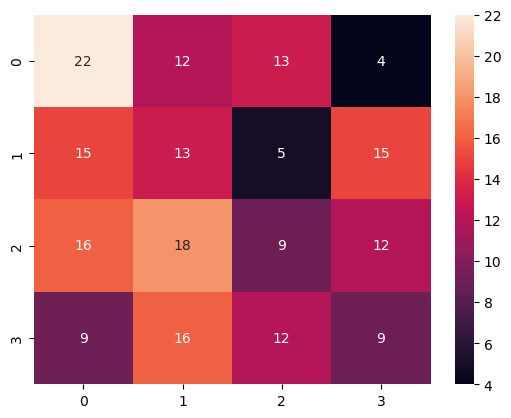

In [98]:
#training
ytest_pred = gb_Classifier_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [99]:
#GradientBoost with Hyperparameter
hyp = {
    "n_estimators": np.arange(10, 201, 10),  
    "learning_rate": np.linspace(0.01, 2, 50),
    "max_depth": [1,2,3,4] 
}

In [100]:
# Randomized Search Cross-Validation

rscv_gb = RandomizedSearchCV(estimator=gb_Classifier_model, param_distributions=hyp, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)
rscv_gb.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.05061224, 0.09122449, 0.13183673, 0.17244898,
       0.21306122, 0.25367347, 0.29428571, 0.33489796, 0.3755102 ,
       0.41612245, 0.45673469, 0.49734694, 0.53795918, 0.57857143,
       0.61918367, 0.65979592, 0.70040816, 0.74102041, 0.78163265,
       0.822...
       1.22836735, 1.26897959, 1.30959184, 1.35020408, 1.39081633,
       1.43142857, 1.47204082, 1.51265306, 1.55326531, 1.59387755,
       1.6344898 , 1.67510204, 1.71571429, 1.75632653, 1.79693878,
       1.83755102, 1.87816327, 1.91877551, 1.95938776, 2.        ]),
                                        'max_depth': [1, 2, 3, 4],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])},
                   random_state=42, verbose=2)

In [101]:
# Get the best parameters and the best estimator
best_params = rscv_gb.best_params_
best_estimator = rscv_gb.best_estimator_

print("Best Parameters: ", best_params)
print("Best Estimator: ", best_estimator)

Best Parameters:  {'n_estimators': 130, 'max_depth': 1, 'learning_rate': 1.9187755102040818}
Best Estimator:  GradientBoostingClassifier(learning_rate=1.9187755102040818, max_depth=1,
                           n_estimators=130, random_state=42)


In [102]:
ytrain_pred = best_estimator.predict(xtrain)

Accuracy = 0.78625
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       206
           1       0.83      0.73      0.78       192
           2       0.74      0.82      0.78       203
           3       0.85      0.77      0.81       199

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800

Axes(0.125,0.11;0.62x0.77)


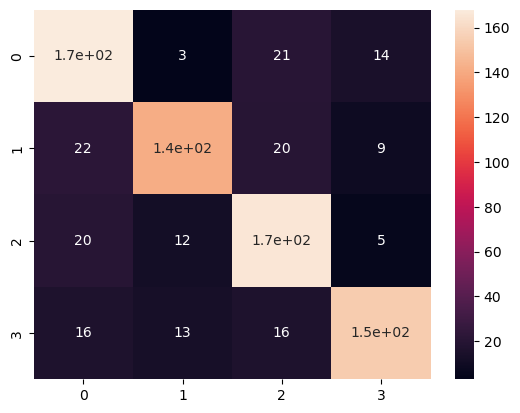

In [103]:
#Evaluation of Testing Data
#training

ytrain_pred = gb_Classifier_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.265
              precision    recall  f1-score   support

           0       0.35      0.43      0.39        51
           1       0.22      0.27      0.24        48
           2       0.23      0.16      0.19        55
           3       0.23      0.20      0.21        46

    accuracy                           0.27       200
   macro avg       0.26      0.27      0.26       200
weighted avg       0.26      0.27      0.26       200

Axes(0.125,0.11;0.62x0.77)


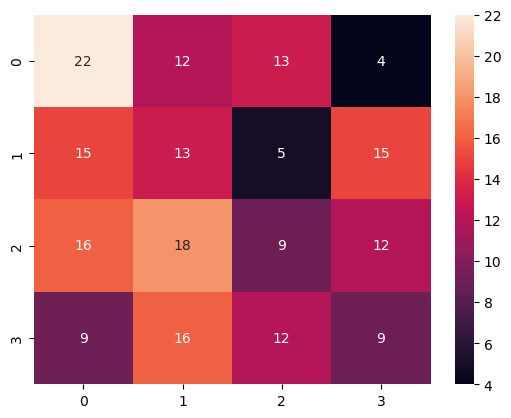

In [104]:
#training
ytest_pred = gb_Classifier_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [105]:
### 6. XG Boost

In [106]:
xgb_classifier = XGBClassifier(random_state=42)


In [107]:
# Fit the AdaBoost Classifier
xgb_classifier_model=xgb_classifier.fit(xtrain, ytrain)

In [108]:
# Training predictions and evaluation
ytrain_predict = xgb_classifier_model.predict(xtrain)

Accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       206
           1       1.00      1.00      1.00       192
           2       1.00      1.00      1.00       203
           3       1.00      1.00      1.00       199

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Axes(0.125,0.11;0.62x0.77)


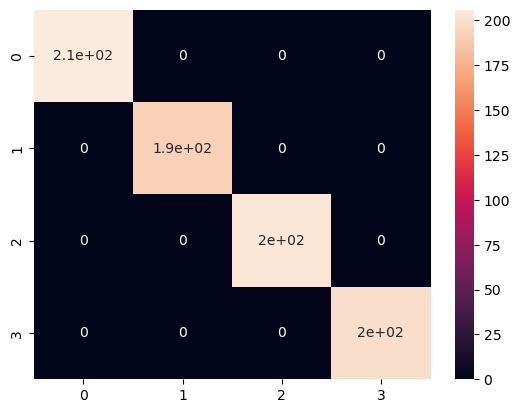

In [109]:
#Evaluation of Testing Data
#training

ytrain_pred = xgb_classifier_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.3
              precision    recall  f1-score   support

           0       0.35      0.47      0.40        51
           1       0.22      0.23      0.23        48
           2       0.23      0.18      0.20        55
           3       0.38      0.33      0.35        46

    accuracy                           0.30       200
   macro avg       0.30      0.30      0.30       200
weighted avg       0.29      0.30      0.29       200

Axes(0.125,0.11;0.62x0.77)


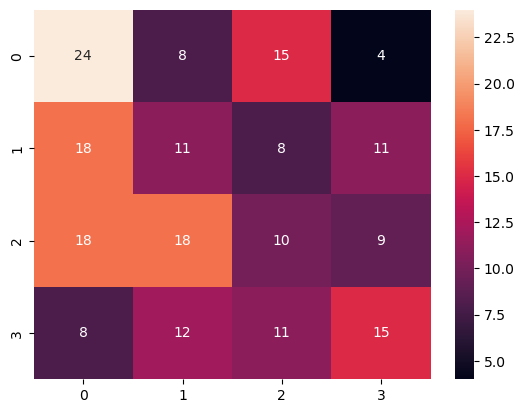

In [110]:
#training
ytest_pred = xgb_classifier_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [111]:
# 7 SVM

In [112]:
svm_classifier=SVC(random_state=42)
svm_classifier

SVC(random_state=42)

In [113]:
# Fit the AdaBoost Classifier
svm_classifier_model=svm_classifier.fit(xtrain, ytrain)
svm_classifier_model

SVC(random_state=42)

In [114]:
# Training predictions and evaluation
ytrain_predict = svm_classifier_model.predict(xtrain)

Accuracy = 0.2725
              precision    recall  f1-score   support

           0       0.27      0.62      0.38       206
           1       0.40      0.05      0.09       192
           2       0.26      0.40      0.32       203
           3       0.00      0.00      0.00       199

    accuracy                           0.27       800
   macro avg       0.23      0.27      0.20       800
weighted avg       0.23      0.27      0.20       800

Axes(0.125,0.11;0.62x0.77)


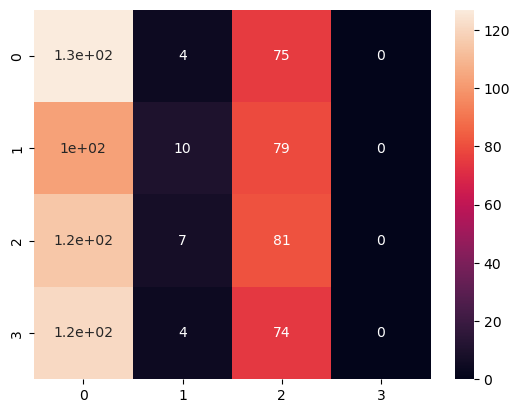

In [115]:
#Evaluation of Testing Data
#training

ytrain_pred = svm_classifier_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.23
              precision    recall  f1-score   support

           0       0.25      0.57      0.34        51
           1       0.20      0.02      0.04        48
           2       0.21      0.29      0.24        55
           3       0.00      0.00      0.00        46

    accuracy                           0.23       200
   macro avg       0.16      0.22      0.16       200
weighted avg       0.17      0.23      0.16       200

Axes(0.125,0.11;0.62x0.77)


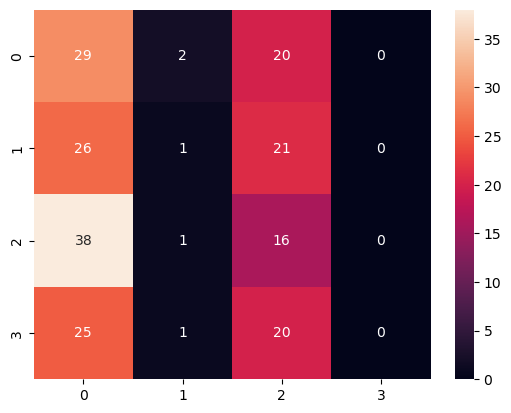

In [116]:
#training
ytest_pred = svm_classifier_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [117]:
#8 KNN


In [118]:
knn_classifier=KNeighborsClassifier(n_neighbors=42)

In [119]:
# Fit the Knn Classifier
knn_classifier_model=knn_classifier.fit(xtrain, ytrain)
knn_classifier_model

KNeighborsClassifier(n_neighbors=42)

In [120]:
# Training predictions and evaluation
ytrain_predict = knn_classifier_model.predict(xtrain)

Accuracy = 0.32375
              precision    recall  f1-score   support

           0       0.33      0.47      0.38       206
           1       0.32      0.22      0.26       192
           2       0.36      0.33      0.35       203
           3       0.29      0.26      0.27       199

    accuracy                           0.32       800
   macro avg       0.32      0.32      0.32       800
weighted avg       0.32      0.32      0.32       800

Axes(0.125,0.11;0.62x0.77)


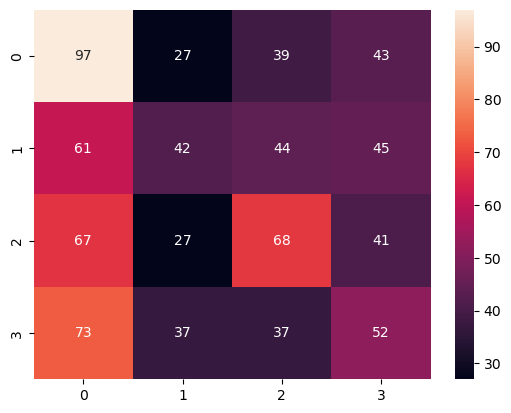

In [121]:
#Evaluation of Testing Data
#training

ytrain_pred = knn_classifier_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.23
              precision    recall  f1-score   support

           0       0.33      0.49      0.39        51
           1       0.13      0.15      0.14        48
           2       0.24      0.16      0.20        55
           3       0.15      0.11      0.13        46

    accuracy                           0.23       200
   macro avg       0.21      0.23      0.21       200
weighted avg       0.22      0.23      0.22       200

Axes(0.125,0.11;0.62x0.77)


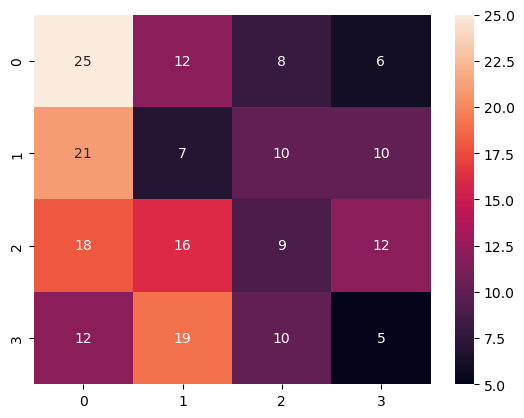

In [122]:
#training
ytest_pred = knn_classifier_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [123]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Values of k to try
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [124]:
ytrain_pred = best_estimator.predict(xtrain)

Accuracy = 0.32375
              precision    recall  f1-score   support

           0       0.33      0.47      0.38       206
           1       0.32      0.22      0.26       192
           2       0.36      0.33      0.35       203
           3       0.29      0.26      0.27       199

    accuracy                           0.32       800
   macro avg       0.32      0.32      0.32       800
weighted avg       0.32      0.32      0.32       800

Axes(0.125,0.11;0.62x0.77)


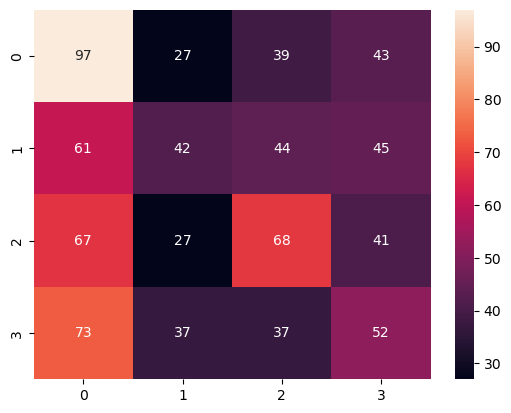

In [125]:
#Evaluation of Testing Data
#training

ytrain_pred = knn_classifier_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.23
              precision    recall  f1-score   support

           0       0.33      0.49      0.39        51
           1       0.13      0.15      0.14        48
           2       0.24      0.16      0.20        55
           3       0.15      0.11      0.13        46

    accuracy                           0.23       200
   macro avg       0.21      0.23      0.21       200
weighted avg       0.22      0.23      0.22       200

Axes(0.125,0.11;0.62x0.77)


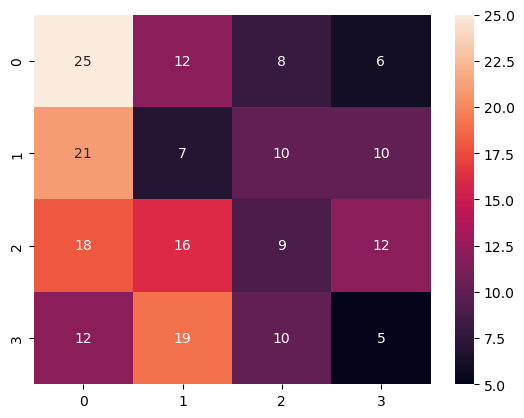

In [126]:
#training
ytest_pred = knn_classifier_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [127]:
## 8.Naive Bayes

In [155]:
# Initialize the Naive Bayes classifier
nb_Classifier =BernoulliNB()

In [156]:
nb_model=nb_Classifier.fit(xtrain, ytrain)
nb_model

BernoulliNB()

In [157]:
# Training predictions and evaluation
ytrain_predict = nb_model.predict(xtrain)

Accuracy = 0.3416666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.34      1.00      0.51        41
           2       0.00      0.00      0.00        39

    accuracy                           0.34       120
   macro avg       0.11      0.33      0.17       120
weighted avg       0.12      0.34      0.17       120

Axes(0.125,0.11;0.62x0.77)


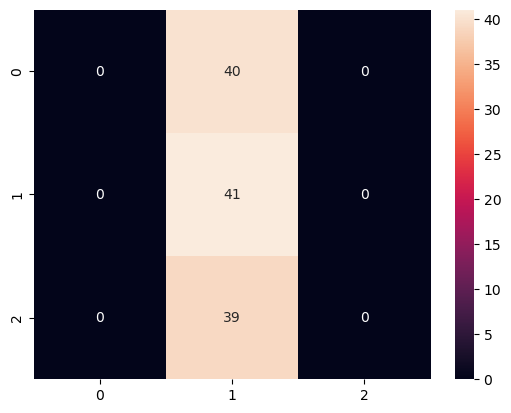

In [158]:
#Evaluation of Testing Data
#training

ytrain_pred = nb_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.46         9
           2       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30

Axes(0.125,0.11;0.62x0.77)


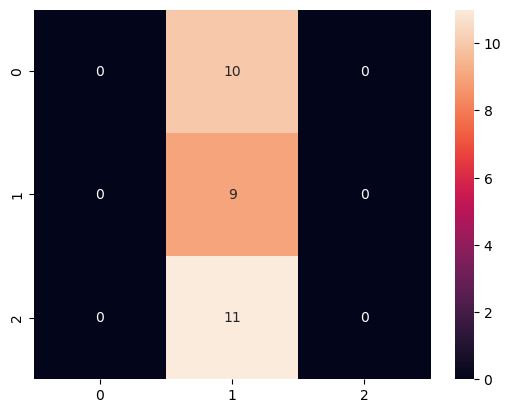

In [159]:
#training
ytest_pred = nb_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [169]:
# Define the estimator
nb = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-6,1e-2,1e-5,1e-7]  # Smoothing parameter
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy')

Accuracy = 0.3416666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.34      1.00      0.51        41
           2       0.00      0.00      0.00        39

    accuracy                           0.34       120
   macro avg       0.11      0.33      0.17       120
weighted avg       0.12      0.34      0.17       120

Axes(0.125,0.11;0.62x0.77)


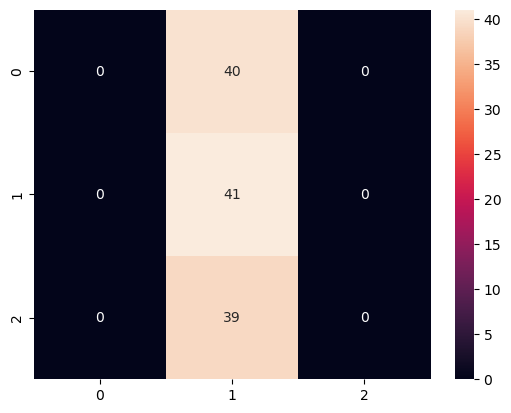

In [170]:
#Evaluation of Testing Data
#training

ytrain_pred = nb_model.predict(xtrain)

print(f"Accuracy = {accuracy_score(ytrain,ytrain_pred)}")
print(classification_report(ytrain,ytrain_pred))
print(sns.heatmap(confusion_matrix(ytrain,ytrain_pred),annot=True))

Accuracy = 0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.46         9
           2       0.00      0.00      0.00        11

    accuracy                           0.30        30
   macro avg       0.10      0.33      0.15        30
weighted avg       0.09      0.30      0.14        30

Axes(0.125,0.11;0.62x0.77)


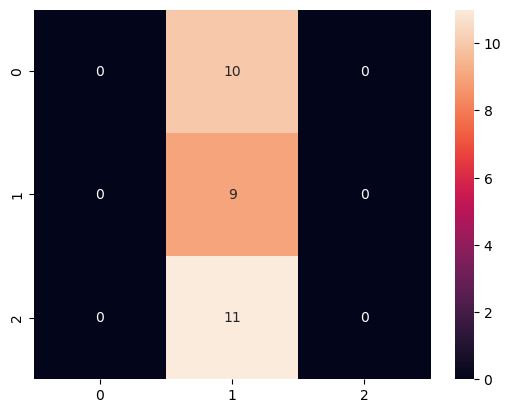

In [171]:
#training
ytest_pred = nb_model.predict(xtest)

print(f"Accuracy = {accuracy_score(ytest,ytest_pred)}")
print(classification_report(ytest,ytest_pred))
print(sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True))

In [183]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
import pickle


def evaluate_models(models, xtrain, ytrain, xtest, ytest):
    """
    Evaluate multiple models and return a DataFrame with metrics in percentage format.

    Parameters:
    models (dict): A dictionary where keys are algorithm names and values are trained model objects.
    xtrain (array-like): The training feature data.
    ytrain (array-like): The true labels for the training data.
    xtest (array-like): The test feature data.
    ytest (array-like): The true labels for the test data.

    Returns:
    pd.DataFrame: A DataFrame containing evaluation metrics for all models in percentage format.
    """
    results = []

    for algorithm_name, model in models.items():
        # Train the model (if not already trained)
        model.fit(xtrain, ytrain)

        # Predictions
        ytrain_pred = model.predict(xtrain)
        ytest_pred = model.predict(xtest)

        # Metrics
        train_accuracy = accuracy_score(ytrain, ytrain_pred) * 100
        test_accuracy = accuracy_score(ytest, ytest_pred) * 100

        # Handle multiclass metrics
        f1 = f1_score(ytest, ytest_pred, average='weighted') * 100
        precision = precision_score(ytest, ytest_pred, average='weighted') * 100
        recall = recall_score(ytest, ytest_pred, average='weighted') * 100

        # Append results with percentage format
        results.append({
            'model': algorithm_name,
            'train_accuracy': f"{round(train_accuracy, 2)}%",
            'test_accuracy': f"{round(test_accuracy, 2)}%",
            'f1_score': f"{round(f1, 2)}%",
            'precision': f"{round(precision, 2)}%",
            'recall': f"{round(recall, 2)}%"
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)

    # Sort by test accuracy (descending)
    results_df = results_df.sort_values(by='test_accuracy', ascending=False, key=lambda x: x.str.rstrip('%').astype(float))

    return results_df


# Dictionary of trained models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Decision Tree with Hyperparameter Tuning": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Random Forest with Hyperparameter Tuning": RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "AdaBoost with Hyperparameter Tuning": AdaBoostClassifier(n_estimators=150, random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "Gradient Boost with Hyperparameter Tuning": GradientBoostingClassifier(n_estimators=150, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-NN": KNeighborsClassifier(),
    "K-NN with Hyperparameter Tuning": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": BernoulliNB(),
    "Naive Bayes with Hyperparameter Tuning": BernoulliNB(alpha=0.1)
}

# Example data (replace with your actual data)
from sklearn.datasets import load_iris
x, y = load_iris(return_X_y=True)  # Replace with your dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Evaluate all models
results_df = evaluate_models(models, xtrain, ytrain, xtest, ytest)

# Display the results
print("Model Evaluation Results:")
print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

# Identify the best model
best_model_name = results_df.iloc[0]['model']
best_accuracy = results_df.iloc[0]['test_accuracy']
print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_accuracy}")

# Save the best model
best_model = models[best_model_name]
with open("Electricity.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("\nBest model saved as 'Electricity.pkl'.")

Model Evaluation Results:
+-------------------------------------------+----------------+---------------+----------+-----------+--------+
|                   model                   | train_accuracy | test_accuracy | f1_score | precision | recall |
+-------------------------------------------+----------------+---------------+----------+-----------+--------+
|            Logistic Regression            |     97.5%      |    100.0%     |  100.0%  |  100.0%   | 100.0% |
|               Decision Tree               |     100.0%     |    100.0%     |  100.0%  |  100.0%   | 100.0% |
| Decision Tree with Hyperparameter Tuning  |     100.0%     |    100.0%     |  100.0%  |  100.0%   | 100.0% |
|               Random Forest               |     100.0%     |    100.0%     |  100.0%  |  100.0%   | 100.0% |
| Random Forest with Hyperparameter Tuning  |     100.0%     |    100.0%     |  100.0%  |  100.0%   | 100.0% |
|                 AdaBoost                  |     95.0%      |    100.0%     |  100.0%

In [179]:
def Prediction(Monthly_Consumption_kWh, Household_Size, House_Type, Heating_Type, 
                Appliances_Count, Avg_Daily_Usage_kWh, Month, Region,Solar_Panels):
    test_data = {
      'Monthly Consumption (kWh)': [Monthly_Consumption_kWh],
      'Household Size': [Household_Size],
      'House Type': [House_Type],
      'Heating Type': [Heating_Type],
      'Appliances Count': [Appliances_Count],
      'Avg Daily Usage (kWh)': [Avg_Daily_Usage_kWh],
      'Month': [Month],
      'Region': [Region],
      'Solar Panels': [Solar_Panels]
  } 
    
    test_df = pd.DataFrame(test_data)
    print(test_df)
    
    return f"Efficiency = {logistic_reg_model.predict(test_df)[0]}"

In [180]:
Prediction(278.69,1,2,0,8.0,9.29,8,3,1)

   Monthly Consumption (kWh)  Household Size  House Type  Heating Type  \
0                     278.69               1           2             0   

   Appliances Count  Avg Daily Usage (kWh)  Month  Region  Solar Panels  
0               8.0                   9.29      8       3             1  


'Efficiency = 0'

Key Challenges:
1.Unpredictable Demand: Sudden spikes in electricity usage can cause power shortages or wastage.
2.High Energy Bills: Inefficient consumption leads to increased costs for both providers and consumers.
3.Sustainability Issues: Reducing energy wastage is crucial for environmental impact and green energy initiatives.


Business Insights & Recommendations: Provide actionable insights to energy providers for optimizing power distribution and cost management.
